<a href="https://colab.research.google.com/github/sharonrose11/Capstone-2-Toxic-Release-Management-/blob/main/New_Capstone_file_changed_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toxic Waste Management Project (Capstone)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
import requests
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\sharo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated and will be removed in a future release



In [ ]:
df=pd.read_csv("C:\\Users\\sharo\\Downloads\\city_day_us.csv",parse_dates = ["Date"])
df

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\3196891170.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



City       Date  n-Hexane  Formaldehyde   Lead  Zinc compounds  \
0          New York 2015-01-01       NaN           NaN   0.92           18.22   
1          New York 2015-02-01       NaN           NaN   0.97           15.69   
2          New York 2015-03-01       NaN           NaN  17.40           19.30   
3          New York 2015-04-01       NaN           NaN   1.70           18.48   
4          New York 2015-05-01       NaN           NaN  22.10           21.42   
...             ...        ...       ...           ...    ...             ...   
29526  Philadelphia 2020-06-27     15.02         50.94   7.68           25.06   
29527  Philadelphia 2020-06-28     24.38         74.09   3.42           26.06   
29528  Philadelphia 2020-06-29     22.91         65.73   3.45           29.53   
29529  Philadelphia 2020-06-30     16.64         49.97   4.05           29.26   
29530  Philadelphia 2020-01-07     15.00         66.00   0.40           26.85   

       Nickel  Chromium  Copper  Nitrate Compounds  Manganese  Methanol  \
0       17.15       NaN    0.92              27.64     133.36      0.00   
1       16.46       NaN    0.97              24.55      34.06      3.68   
2       29.70       NaN   17.40              29.07      30.70      6.80   
3       17.97       NaN    1.70              18.59      36.08      4.43   
4       37.76       NaN   22.10              39.33      39.31      7.01   
...       ...       ...     ...                ...        ...       ...   
29526   19.54     12.47    0.47               8.55      23.30      2.24   
29527   16.53     11.99    0.52              12.72      30.14      0.74   
29528   18.33     10.71    0.48               8.42      30.96      0.01   
29529   18.80     10.03    0.52               9.84      28.30      0.00   
29530   14.05      5.20    0.59               2.10      17.05       NaN   

       Toluene  Ammonia   AQI    AQI_Bucket  
0         0.02     0.00   NaN           NaN  
1         5.50     3.77   NaN           NaN  
2        16.40     2.25   NaN           NaN  
3        10.14     1.00   NaN           NaN  
4        18.89     2.78   NaN           NaN  
...        ...      ...   ...           ...  
29526    12.07     0.73  41.0          Good  
29527     2.21     0.38  70.0  Satisfactory  
29528     0.01     0.00  68.0  Satisfactory  
29529     0.00     0.00  54.0  Satisfactory  
29530      NaN      NaN  50.0          Good  

[29531 rows x 16 columns]

In [ ]:
print(df.isnull().sum())

City                     0
Date                     0
n-Hexane              4598
Formaldehyde         11140
Lead                  3582
Zinc compounds        3585
Nickel                4185
Chromium             10328
Copper                2059
Nitrate Compounds     3854
Manganese             4022
Methanol              5623
Toluene               8041
Ammonia              18109
AQI                   4681
AQI_Bucket            4681
dtype: int64


In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Ammonia              61.322001
Formaldehyde         37.723071
Chromium             34.973418
Toluene              27.229014
Methanol             19.041008
AQI                  15.851139
AQI_Bucket           15.851139
n-Hexane             15.570079
Nickel               14.171549
Manganese            13.619586
Nitrate Compounds    13.050692
Zinc compounds       12.139785
Lead                 12.129626
Copper                6.972334
City                  0.000000
Date                  0.000000
dtype: float64

In [ ]:

df.describe()

n-Hexane  Formaldehyde          Lead  Zinc compounds        Nickel  \
count  24933.000000  18391.000000  25949.000000    25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730       28.560659     32.309123   
std       64.661449     90.605110     22.785846       24.474746     31.646011   
min        0.040000      0.010000      0.020000        0.010000      0.000000   
25%       28.820000     56.255000      5.630000       11.750000     12.820000   
50%       48.570000     95.680000      9.890000       21.690000     23.520000   
75%       80.590000    149.745000     19.950000       37.620000     40.127500   
max      949.990000   1000.000000    390.680000      362.210000    467.630000   

           Chromium        Copper  Nitrate Compounds     Manganese  \
count  19203.000000  27472.000000       25677.000000  25509.000000   
mean      23.483476      2.248598          14.531977     34.491430   
std       25.684275      6.962884          18.133775     21.694928   
min        0.010000      0.000000           0.010000      0.010000   
25%        8.580000      0.510000           5.670000     18.860000   
50%       15.850000      0.890000           9.160000     30.840000   
75%       30.020000      1.450000          15.220000     45.570000   
max      352.890000    175.810000         193.860000    257.730000   

           Methanol       Toluene       Ammonia           AQI  
count  23908.000000  21490.000000  11422.000000  24850.000000  
mean       3.280840      8.700972      3.070128    166.463581  
std       15.811136     19.969164      6.323247    140.696585  
min        0.000000      0.000000      0.000000     13.000000  
25%        0.120000      0.600000      0.140000     81.000000  
50%        1.070000      2.970000      0.980000    118.000000  
75%        3.080000      9.150000      3.350000    208.000000  
max      455.030000    454.850000    170.370000   2049.000000

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

City       Date  n-Hexane  Formaldehyde   Lead  Zinc compounds  Nickel  \
0  New York 2015-01-01       NaN           NaN   0.92           18.22   17.15   
1  New York 2015-02-01       NaN           NaN   0.97           15.69   16.46   
2  New York 2015-03-01       NaN           NaN  17.40           19.30   29.70   
3  New York 2015-04-01       NaN           NaN   1.70           18.48   17.97   
4  New York 2015-05-01       NaN           NaN  22.10           21.42   37.76   

   Chromium  Copper  Nitrate Compounds  Manganese  Methanol  Toluene  Ammonia  \
0       NaN    0.92              27.64     133.36      0.00     0.02     0.00   
1       NaN    0.97              24.55      34.06      3.68     5.50     3.77   
2       NaN   17.40              29.07      30.70      6.80    16.40     2.25   
3       NaN    1.70              18.59      36.08      4.43    10.14     1.00   
4       NaN   22.10              39.33      39.31      7.01    18.89     2.78   

   AQI Air_quality  
0  NaN         NaN  
1  NaN         NaN  
2  NaN         NaN  
3  NaN         NaN  
4  NaN         NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   City               29531 non-null  object        
 1   Date               29531 non-null  datetime64[ns]
 2   n-Hexane           24933 non-null  float64       
 3   Formaldehyde       18391 non-null  float64       
 4   Lead               25949 non-null  float64       
 5   Zinc compounds     25946 non-null  float64       
 6   Nickel             25346 non-null  float64       
 7   Chromium           19203 non-null  float64       
 8   Copper             27472 non-null  float64       
 9   Nitrate Compounds  25677 non-null  float64       
 10  Manganese          25509 non-null  float64       
 11  Methanol           23908 non-null  float64       
 12  Toluene            21490 non-null  float64       
 13  Ammonia            11422 non-null  float64       
 14  AQI   

### Feature Enginnering

In [ ]:
# identify duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

           City       Date  n-Hexane  Formaldehyde  Lead  Zinc compounds  \
22393  New York 2016-06-22       NaN           NaN   NaN             NaN   
22394  New York 2016-06-23       NaN           NaN   NaN             NaN   
22396  New York 2016-06-25       NaN           NaN   NaN             NaN   
22397  New York 2016-06-26       NaN           NaN   NaN             NaN   
26048   Houston 2018-05-01       NaN           NaN   NaN             NaN   
26049   Houston 2018-06-01       NaN           NaN   NaN             NaN   
26050   Houston 2018-07-01       NaN           NaN   NaN             NaN   
26051   Houston 2018-08-01       NaN           NaN   NaN             NaN   
26052   Houston 2018-09-01       NaN           NaN   NaN             NaN   
26280   Houston 2018-08-25       NaN           NaN   NaN             NaN   
26281   Houston 2018-08-26       NaN           NaN   NaN             NaN   

       Nickel  Chromium  Copper  Nitrate Compounds  Manganese  Methanol  \
22393     Na

In [ ]:
# count the number of duplicates
num_duplicates = df.duplicated().sum()
print(num_duplicates)

11


In [ ]:
# replacing with the mean values

df.iloc[:, 0:14]=df.fillna(df.mean())
df

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\2848488401.py:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\2848488401.py:3: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\2848488401.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



City       Date   n-Hexane  Formaldehyde   Lead  \
0          New York 2015-01-01  67.450578    118.127103   0.92   
1          New York 2015-02-01  67.450578    118.127103   0.97   
2          New York 2015-03-01  67.450578    118.127103  17.40   
3          New York 2015-04-01  67.450578    118.127103   1.70   
4          New York 2015-05-01  67.450578    118.127103  22.10   
...             ...        ...        ...           ...    ...   
29526  Philadelphia 2020-06-27  15.020000     50.940000   7.68   
29527  Philadelphia 2020-06-28  24.380000     74.090000   3.42   
29528  Philadelphia 2020-06-29  22.910000     65.730000   3.45   
29529  Philadelphia 2020-06-30  16.640000     49.970000   4.05   
29530  Philadelphia 2020-01-07  15.000000     66.000000   0.40   

       Zinc compounds  Nickel   Chromium  Copper  Nitrate Compounds  \
0               18.22   17.15  23.483476    0.92              27.64   
1               15.69   16.46  23.483476    0.97              24.55   
2               19.30   29.70  23.483476   17.40              29.07   
3               18.48   17.97  23.483476    1.70              18.59   
4               21.42   37.76  23.483476   22.10              39.33   
...               ...     ...        ...     ...                ...   
29526           25.06   19.54  12.470000    0.47               8.55   
29527           26.06   16.53  11.990000    0.52              12.72   
29528           29.53   18.33  10.710000    0.48               8.42   
29529           29.26   18.80  10.030000    0.52               9.84   
29530           26.85   14.05   5.200000    0.59               2.10   

       Manganese  Methanol    Toluene   Ammonia   AQI   Air_quality  
0         133.36   0.00000   0.020000  0.000000   NaN           NaN  
1          34.06   3.68000   5.500000  3.770000   NaN           NaN  
2          30.70   6.80000  16.400000  2.250000   NaN           NaN  
3          36.08   4.43000  10.140000  1.000000   NaN           NaN  
4          39.31   7.01000  18.890000  2.780000   NaN           NaN  
...          ...       ...        ...       ...   ...           ...  
29526      23.30   2.24000  12.070000  0.730000  41.0          Good  
29527      30.14   0.74000   2.210000  0.380000  70.0  Satisfactory  
29528      30.96   0.01000   0.010000  0.000000  68.0  Satisfactory  
29529      28.30   0.00000   0.000000  0.000000  54.0  Satisfactory  
29530      17.05   3.28084   8.700972  3.070128  50.0          Good  

[29531 rows x 16 columns]

#### We cannot fill null values of AQI with mean or mode nor we can delete it, So, we will calculate AQI from all 7 measures:

##### The AQI calculation uses 7 measures: n-Hexane, Formaldehyde, Nitrate compounds, Nickel, Chromium, Copper and Manganese.

### calculating Sub-Index

In [ ]:
# n-Hexane Sub-Index calculation
def get_nhexane_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["n-hexane_SubIndex"] = df["n-Hexane"].astype(int).apply(lambda x: get_nhexane_subindex(x))

# Formaldehyde Sub-Index calculation
def get_formaldehyde_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["Formaldehyde_SubIndex"] = df["Formaldehyde"].astype(int).apply(lambda x: get_formaldehyde_subindex(x))


# nitrate Sub-Index calculation
def get_nitrate_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["Nitrate_SubIndex"] = df["Nitrate Compounds"].astype(int).apply(lambda x: get_nitrate_subindex(x))

# Nickel Sub-Index calculation
def get_Nickel_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["Nickel_SubIndex"] = df["Nickel"].astype(int).apply(lambda x: get_Nickel_subindex(x))

# Chromium Sub-Index calculation
def get_Chromium_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["Chromium_SubIndex"] = df["Chromium"].astype(int).apply(lambda x: get_Chromium_subindex(x))

# Copper Sub-Index calculation
def get_Copper_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["Copper_SubIndex"] = df["Copper"].astype(int).apply(lambda x: get_Copper_subindex(x))

# Managanese Sub-Index calculation
def get_Manganese_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["Manganese_SubIndex"] = df["Manganese"].astype(int).apply(lambda x: get_Manganese_subindex(x))

In [ ]:
if pd.isna(df["AQI"]).any():
        df["AQI"] = df["AQI"].fillna(round(df[["n-hexane_SubIndex", "Formaldehyde_SubIndex", "Nitrate_SubIndex", "Nickel_SubIndex","Chromium_SubIndex", "Copper_SubIndex", "Manganese_SubIndex"]].max(axis = 1)))
df

City       Date   n-Hexane  Formaldehyde   Lead  \
0          New York 2015-01-01  67.450578    118.127103   0.92   
1          New York 2015-02-01  67.450578    118.127103   0.97   
2          New York 2015-03-01  67.450578    118.127103  17.40   
3          New York 2015-04-01  67.450578    118.127103   1.70   
4          New York 2015-05-01  67.450578    118.127103  22.10   
...             ...        ...        ...           ...    ...   
29526  Philadelphia 2020-06-27  15.020000     50.940000   7.68   
29527  Philadelphia 2020-06-28  24.380000     74.090000   3.42   
29528  Philadelphia 2020-06-29  22.910000     65.730000   3.45   
29529  Philadelphia 2020-06-30  16.640000     49.970000   4.05   
29530  Philadelphia 2020-01-07  15.000000     66.000000   0.40   

       Zinc compounds  Nickel   Chromium  Copper  Nitrate Compounds  ...  \
0               18.22   17.15  23.483476    0.92              27.64  ...   
1               15.69   16.46  23.483476    0.97              24.55  ...   
2               19.30   29.70  23.483476   17.40              29.07  ...   
3               18.48   17.97  23.483476    1.70              18.59  ...   
4               21.42   37.76  23.483476   22.10              39.33  ...   
...               ...     ...        ...     ...                ...  ...   
29526           25.06   19.54  12.470000    0.47               8.55  ...   
29527           26.06   16.53  11.990000    0.52              12.72  ...   
29528           29.53   18.33  10.710000    0.48               8.42  ...   
29529           29.26   18.80  10.030000    0.52               9.84  ...   
29530           26.85   14.05   5.200000    0.59               2.10  ...   

        Ammonia    AQI   Air_quality  n-hexane_SubIndex  \
0      0.000000  293.0           NaN               67.0   
1      3.770000  293.0           NaN               67.0   
2      2.250000  300.0           NaN               67.0   
3      1.000000  293.0           NaN               67.0   
4      2.780000  329.0           NaN               67.0   
...         ...    ...           ...                ...   
29526  0.730000   41.0          Good               15.0   
29527  0.380000   70.0  Satisfactory               24.0   
29528  0.000000   68.0  Satisfactory               22.0   
29529  0.000000   54.0  Satisfactory               16.0   
29530  3.070128   50.0          Good               15.0   

       Formaldehyde_SubIndex Nitrate_SubIndex  Nickel_SubIndex  \
0                 293.333333            33.75            21.25   
1                 293.333333            30.00            20.00   
2                 293.333333            36.25            36.25   
3                 293.333333            22.50            21.25   
4                 293.333333            48.75            46.25   
...                      ...              ...              ...   
29526              83.333333            10.00            23.75   
29527             146.666667            15.00            20.00   
29528             116.666667            10.00            22.50   
29529              81.666667            11.25            22.50   
29530             120.000000             2.50            17.50   

       Chromium_SubIndex  Copper_SubIndex  Manganese_SubIndex  
0                   5.75         0.000000          148.529412  
1                   5.75         0.000000           34.000000  
2                   5.75       300.000000           30.000000  
3                   5.75        50.000000           36.000000  
4                   5.75       329.411765           39.000000  
...                  ...              ...                 ...  
29526               3.00         0.000000           23.000000  
29527               2.75         0.000000           30.000000  
29528               2.50         0.000000           30.000000  
29529               2.50         0.000000           28.000000  
29530               1.25         0.000000           17.000000  

[29531 rows x 23 columns]

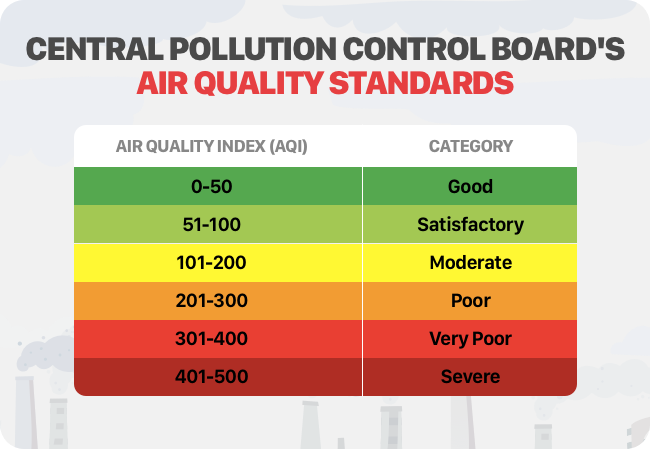

In [ ]:
# Now for removing NaN values of Air_quality we use AQI category

from IPython import display
display.Image("https://w.ndtvimg.com/sites/3/2019/12/18122812/air_pollution_standards_cpcb.png",width = 400, height = 200)

In [ ]:
if pd.isna(df["Air_quality"]).any():
        def get_Air_quality(x):
            if x <= 50:
                return "Good"
            elif x > 50 and x <= 100:
                return "Satisfactory"
            elif x > 100 and x <= 200:
                return "Moderate"
            elif x > 200 and x <= 300:
                return "Poor"
            elif x > 300 and x <= 400:
                return "Very Poor"
            elif x > 400:
                return "Severe"
            else:
                return '0'

        df["Air_quality"] = df["Air_quality"].fillna(df["AQI"].apply(lambda x: get_Air_quality(x)))

df


City       Date   n-Hexane  Formaldehyde   Lead  \
0          New York 2015-01-01  67.450578    118.127103   0.92   
1          New York 2015-02-01  67.450578    118.127103   0.97   
2          New York 2015-03-01  67.450578    118.127103  17.40   
3          New York 2015-04-01  67.450578    118.127103   1.70   
4          New York 2015-05-01  67.450578    118.127103  22.10   
...             ...        ...        ...           ...    ...   
29526  Philadelphia 2020-06-27  15.020000     50.940000   7.68   
29527  Philadelphia 2020-06-28  24.380000     74.090000   3.42   
29528  Philadelphia 2020-06-29  22.910000     65.730000   3.45   
29529  Philadelphia 2020-06-30  16.640000     49.970000   4.05   
29530  Philadelphia 2020-01-07  15.000000     66.000000   0.40   

       Zinc compounds  Nickel   Chromium  Copper  Nitrate Compounds  ...  \
0               18.22   17.15  23.483476    0.92              27.64  ...   
1               15.69   16.46  23.483476    0.97              24.55  ...   
2               19.30   29.70  23.483476   17.40              29.07  ...   
3               18.48   17.97  23.483476    1.70              18.59  ...   
4               21.42   37.76  23.483476   22.10              39.33  ...   
...               ...     ...        ...     ...                ...  ...   
29526           25.06   19.54  12.470000    0.47               8.55  ...   
29527           26.06   16.53  11.990000    0.52              12.72  ...   
29528           29.53   18.33  10.710000    0.48               8.42  ...   
29529           29.26   18.80  10.030000    0.52               9.84  ...   
29530           26.85   14.05   5.200000    0.59               2.10  ...   

        Ammonia    AQI   Air_quality  n-hexane_SubIndex  \
0      0.000000  293.0          Poor               67.0   
1      3.770000  293.0          Poor               67.0   
2      2.250000  300.0          Poor               67.0   
3      1.000000  293.0          Poor               67.0   
4      2.780000  329.0     Very Poor               67.0   
...         ...    ...           ...                ...   
29526  0.730000   41.0          Good               15.0   
29527  0.380000   70.0  Satisfactory               24.0   
29528  0.000000   68.0  Satisfactory               22.0   
29529  0.000000   54.0  Satisfactory               16.0   
29530  3.070128   50.0          Good               15.0   

       Formaldehyde_SubIndex Nitrate_SubIndex  Nickel_SubIndex  \
0                 293.333333            33.75            21.25   
1                 293.333333            30.00            20.00   
2                 293.333333            36.25            36.25   
3                 293.333333            22.50            21.25   
4                 293.333333            48.75            46.25   
...                      ...              ...              ...   
29526              83.333333            10.00            23.75   
29527             146.666667            15.00            20.00   
29528             116.666667            10.00            22.50   
29529              81.666667            11.25            22.50   
29530             120.000000             2.50            17.50   

       Chromium_SubIndex  Copper_SubIndex  Manganese_SubIndex  
0                   5.75         0.000000          148.529412  
1                   5.75         0.000000           34.000000  
2                   5.75       300.000000           30.000000  
3                   5.75        50.000000           36.000000  
4                   5.75       329.411765           39.000000  
...                  ...              ...                 ...  
29526               3.00         0.000000           23.000000  
29527               2.75         0.000000           30.000000  
29528               2.50         0.000000           30.000000  
29529               2.50         0.000000           28.000000  
29530               1.25         0.000000           17.000000  

[29531 rows x 23 columns]

In [ ]:
# Removing the sub index columns because now they are of no use for further process.
df = df.drop(columns=["n-hexane_SubIndex", "Formaldehyde_SubIndex", "Nitrate_SubIndex", "Nickel_SubIndex","Chromium_SubIndex", "Copper_SubIndex", "Manganese_SubIndex"])
df

City       Date   n-Hexane  Formaldehyde   Lead  \
0          New York 2015-01-01  67.450578    118.127103   0.92   
1          New York 2015-02-01  67.450578    118.127103   0.97   
2          New York 2015-03-01  67.450578    118.127103  17.40   
3          New York 2015-04-01  67.450578    118.127103   1.70   
4          New York 2015-05-01  67.450578    118.127103  22.10   
...             ...        ...        ...           ...    ...   
29526  Philadelphia 2020-06-27  15.020000     50.940000   7.68   
29527  Philadelphia 2020-06-28  24.380000     74.090000   3.42   
29528  Philadelphia 2020-06-29  22.910000     65.730000   3.45   
29529  Philadelphia 2020-06-30  16.640000     49.970000   4.05   
29530  Philadelphia 2020-01-07  15.000000     66.000000   0.40   

       Zinc compounds  Nickel   Chromium  Copper  Nitrate Compounds  \
0               18.22   17.15  23.483476    0.92              27.64   
1               15.69   16.46  23.483476    0.97              24.55   
2               19.30   29.70  23.483476   17.40              29.07   
3               18.48   17.97  23.483476    1.70              18.59   
4               21.42   37.76  23.483476   22.10              39.33   
...               ...     ...        ...     ...                ...   
29526           25.06   19.54  12.470000    0.47               8.55   
29527           26.06   16.53  11.990000    0.52              12.72   
29528           29.53   18.33  10.710000    0.48               8.42   
29529           29.26   18.80  10.030000    0.52               9.84   
29530           26.85   14.05   5.200000    0.59               2.10   

       Manganese  Methanol    Toluene   Ammonia    AQI   Air_quality  
0         133.36   0.00000   0.020000  0.000000  293.0          Poor  
1          34.06   3.68000   5.500000  3.770000  293.0          Poor  
2          30.70   6.80000  16.400000  2.250000  300.0          Poor  
3          36.08   4.43000  10.140000  1.000000  293.0          Poor  
4          39.31   7.01000  18.890000  2.780000  329.0     Very Poor  
...          ...       ...        ...       ...    ...           ...  
29526      23.30   2.24000  12.070000  0.730000   41.0          Good  
29527      30.14   0.74000   2.210000  0.380000   70.0  Satisfactory  
29528      30.96   0.01000   0.010000  0.000000   68.0  Satisfactory  
29529      28.30   0.00000   0.000000  0.000000   54.0  Satisfactory  
29530      17.05   3.28084   8.700972  3.070128   50.0          Good  

[29531 rows x 16 columns]

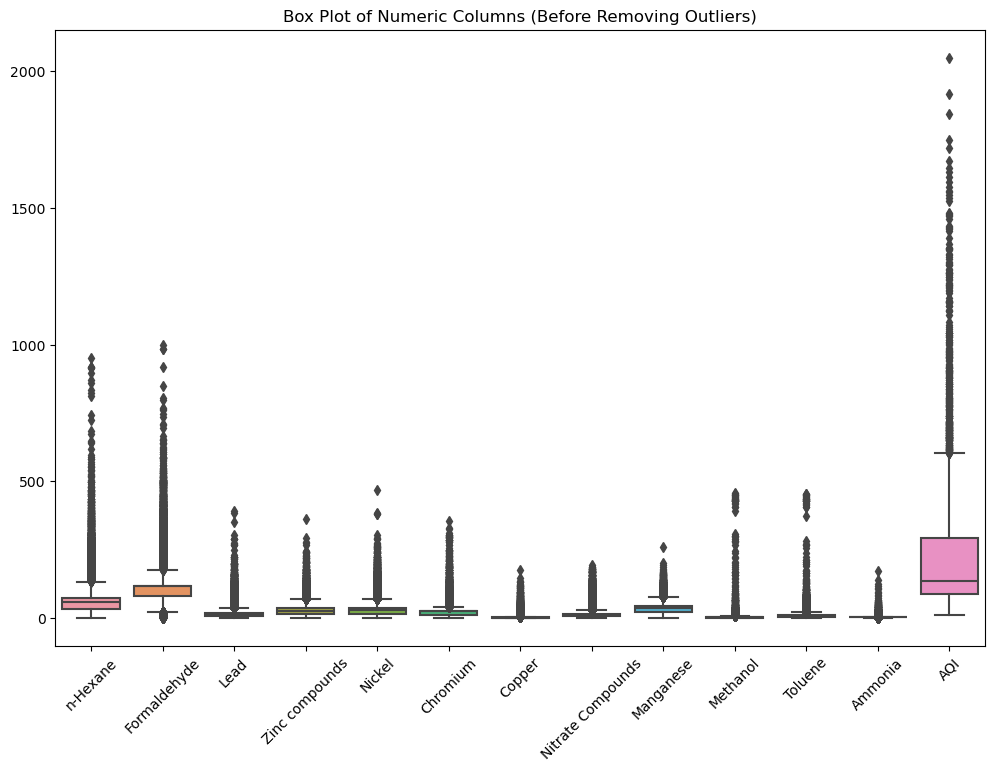

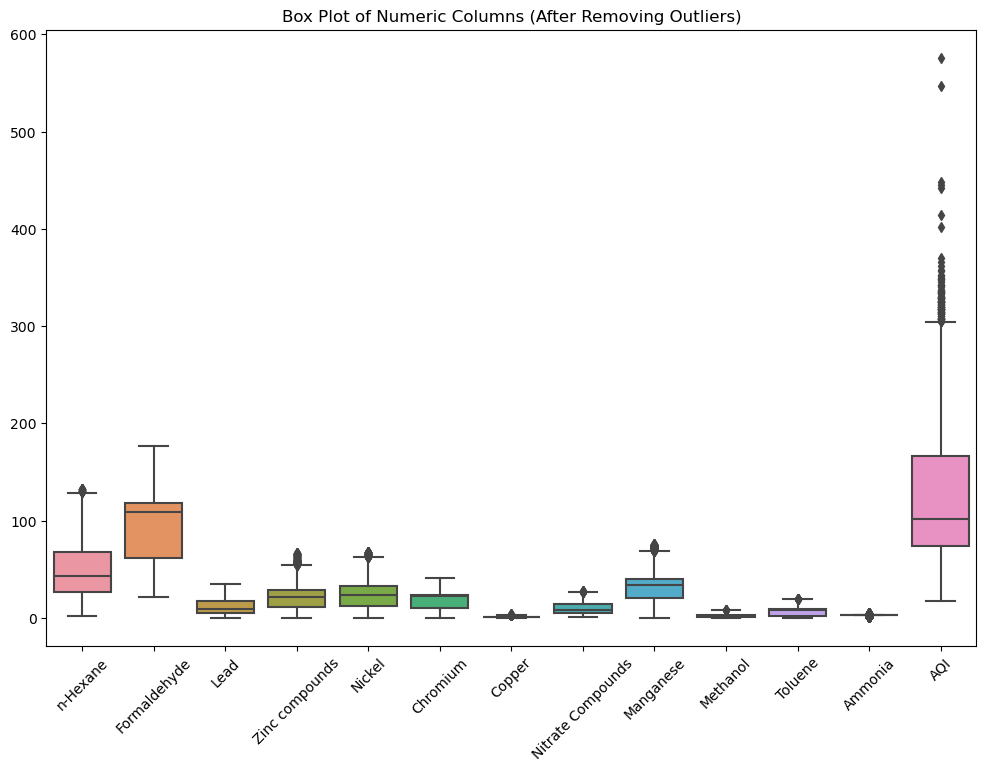

In [ ]:
# Select numeric columns for outlier visualization
numeric_columns = ['n-Hexane', 'Formaldehyde','Lead','Zinc compounds','Nickel','Chromium','Copper','Nitrate Compounds','Manganese','Methanol','Toluene','Ammonia','AQI']

# Create a box plot for each numeric column before removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.show()

# Remove outliers from the dataset
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot for each numeric column after removing outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.show()

##### Formaldehyde and n-Hexane may be major contributors to poor air quality given their high median values.
##### Metals like Nickel, Copper, Lead are present but comparatively less volatile in the dataset.
##### AQI is highly variable, likely influenced by a mix of multiple pollutants.

### Exploratory Data Analysis

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\3020494841.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



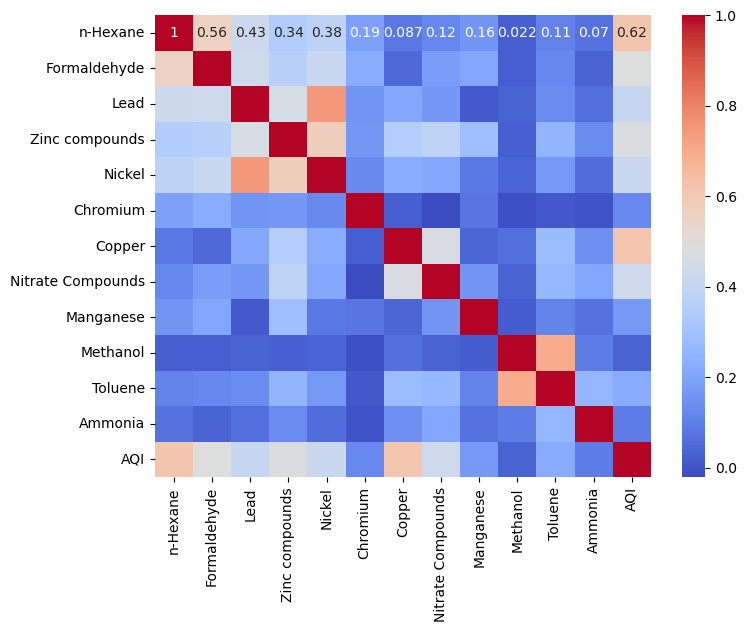

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

1. Formaldehyde & n-Hexane (r ≈ 0.56)
Shows a moderately strong positive correlation.

2. Lead & Zinc Compounds (r ≈ 0.34)
Shows positive correlation, indicating common industrial origins like metal refining etc.

3. Nickel & Zinc/Lead (r ≈ 0.38 & 0.30)
Moderate correlation suggests possible link to fossil fuel combustion or manufacturing emissions.

In [ ]:
#segregating dates into months and years

df['Month']=df.Date.dt.month.astype(str)
df['Year']=df.Date.dt.year.astype(str)

ValueError: num must be an integer with 1 <= num <= 12, not 13

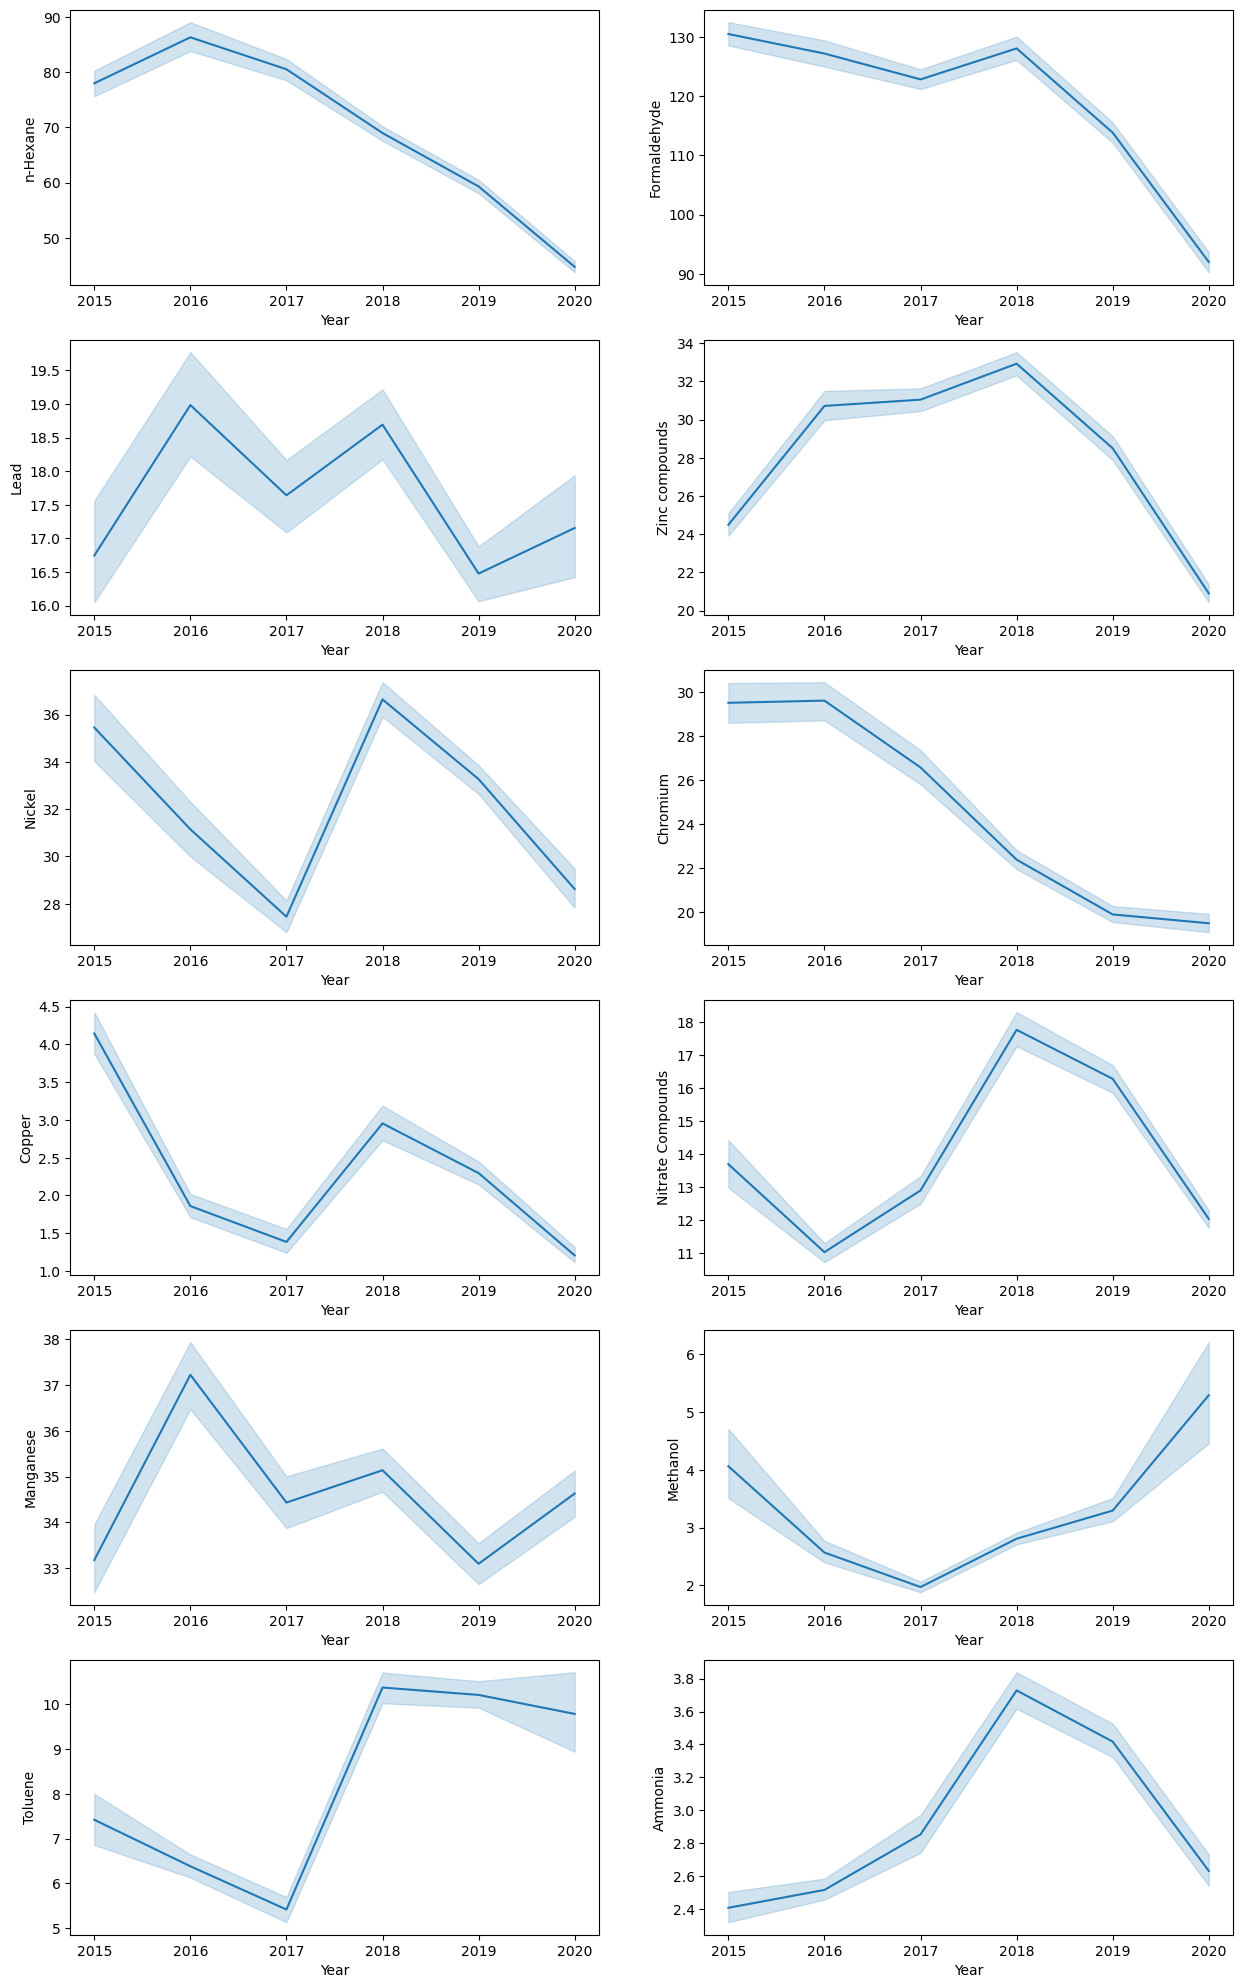

In [ ]:
#line plot analysis for amount of particulate matter and gases  over the years
cols=['n-Hexane', 'Formaldehyde','Lead','Zinc compounds','Nickel','Chromium','Copper','Nitrate Compounds','Manganese','Methanol','Toluene','Ammonia','AQI']

x=df.iloc[:,2:]
fig=plt.figure(figsize=(15,25))
for i,col  in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    sns.lineplot(x='Year',y=col,data=x)

Here we divide the data set into two part namely Air related Pollution content (n-Hexane, Formaldehyde, Zinc compounds, Chromium, Copper) and Industrial Pollution content (Copper, Nitrate Compounds, Manganese, Methanol, Toluene, Ammonia) and find how these contents correlated with AQI (air quality index)

In [ ]:
df2 = df.copy()
df2['Air_Pollution_content'] = df2['n-Hexane']+df2['Formaldehyde']+df2['Lead']+df2['Zinc compounds']+df2['Nickel']+df2['Chromium']+df2['Copper']
df2['Industrial_Pollution_content'] = df2['Nitrate Compounds']+df2['Manganese']+df2['Methanol']+df2['Toluene']+df2['Ammonia']
df2 = df2.drop(['n-Hexane', 'Formaldehyde','Lead','Zinc compounds','Nickel','Chromium','Copper','Nitrate Compounds','Manganese','Methanol','Toluene','Ammonia','AQI'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          29531 non-null  object        
 1   Date                          29531 non-null  datetime64[ns]
 2   Air_quality                   29531 non-null  object        
 3   Month                         29531 non-null  object        
 4   Year                          29531 non-null  object        
 5   Air_Pollution_content         29531 non-null  float64       
 6   Industrial_Pollution_content  29531 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.6+ MB


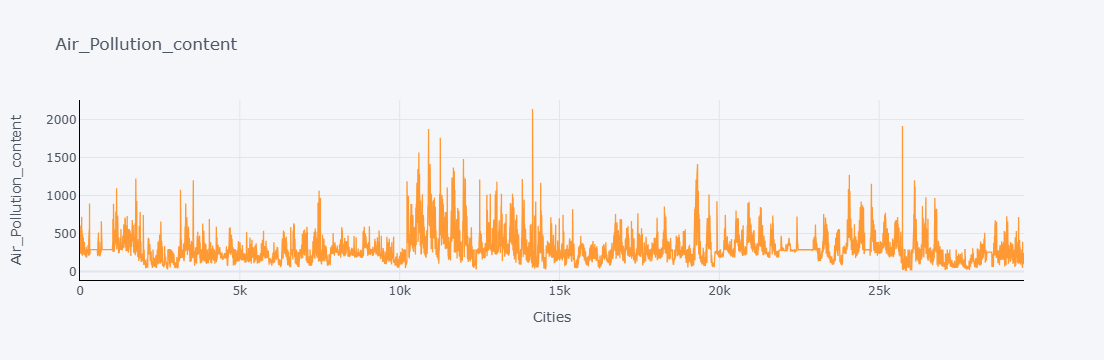

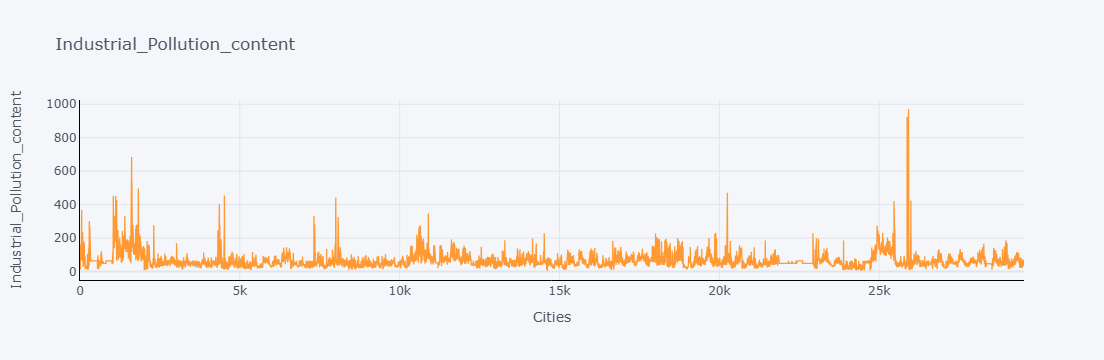

In [ ]:

def ploting(var):
    df2[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black',)
    plt.show()
ploting('Air_Pollution_content')
ploting('Industrial_Pollution_content')

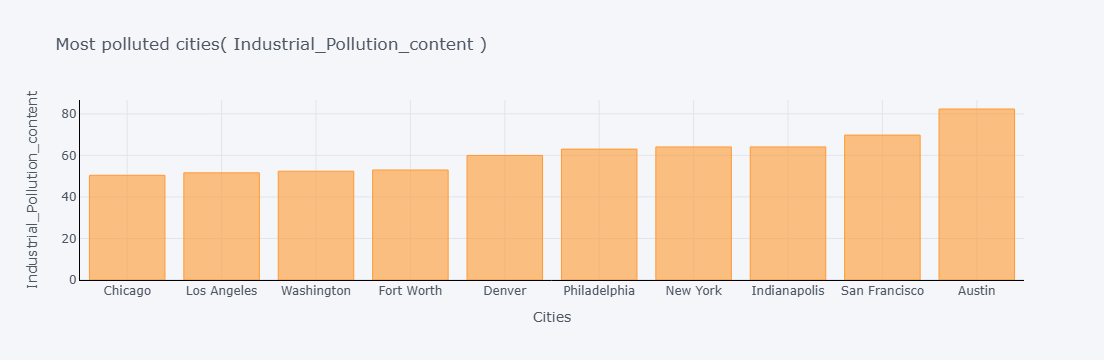

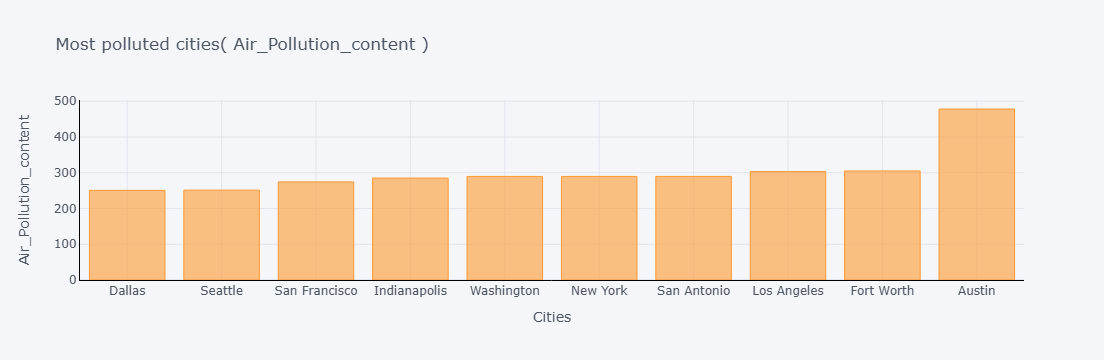

In [ ]:
def max_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var,
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,'Most polluted cities('))

p1 = max_bar_plot('Industrial_Pollution_content')
p2 = max_bar_plot('Air_Pollution_content')

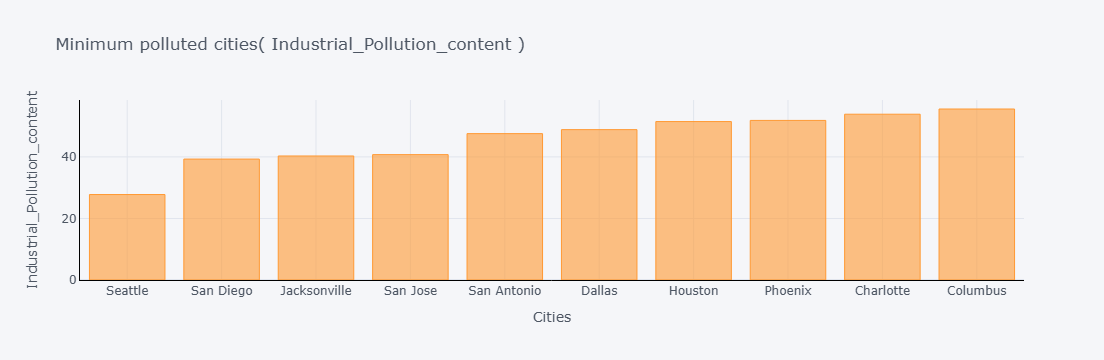

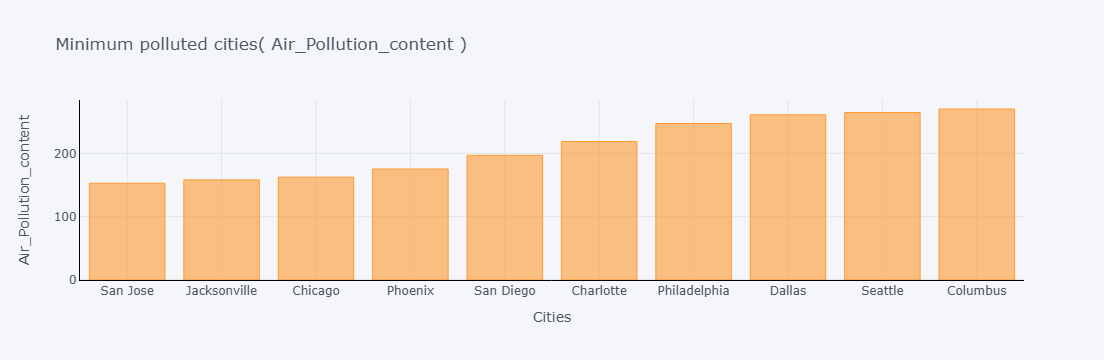

In [ ]:
def min_bar_plot(var):
    x1 = df2[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', xTitle='Cities',yTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial_Pollution_content')
p2 = min_bar_plot('Air_Pollution_content')

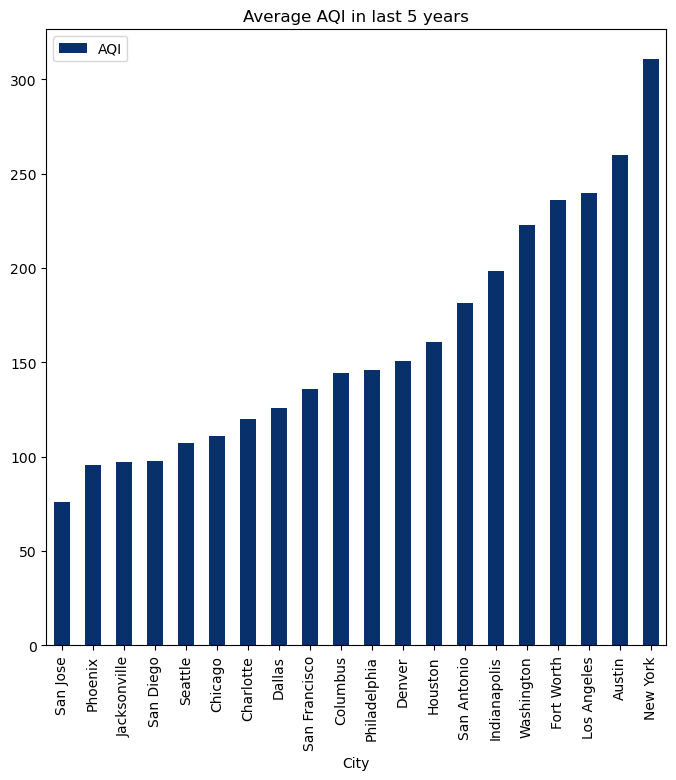

In [ ]:
df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='bar',cmap='Blues_r',figsize=(8,8))
plt.title('Average AQI in last 5 years');


### From above heatmap we observe a strong correlation of Lead with Nickel and of Methanol with Toluene so lets visualize them with the help of scatterplots¶

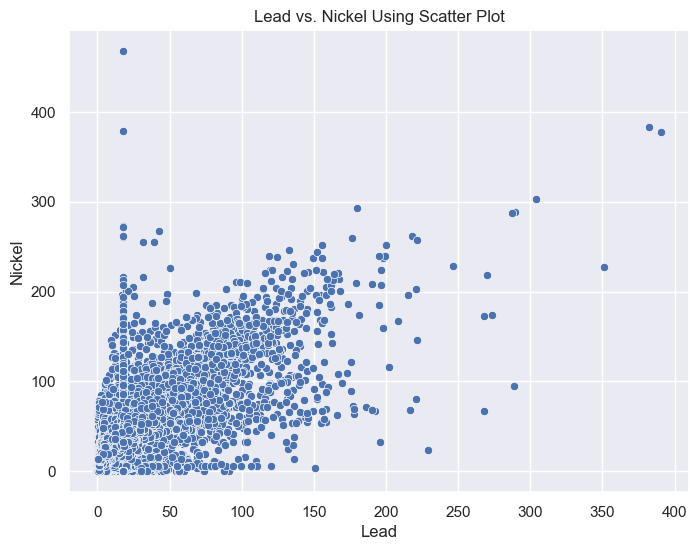

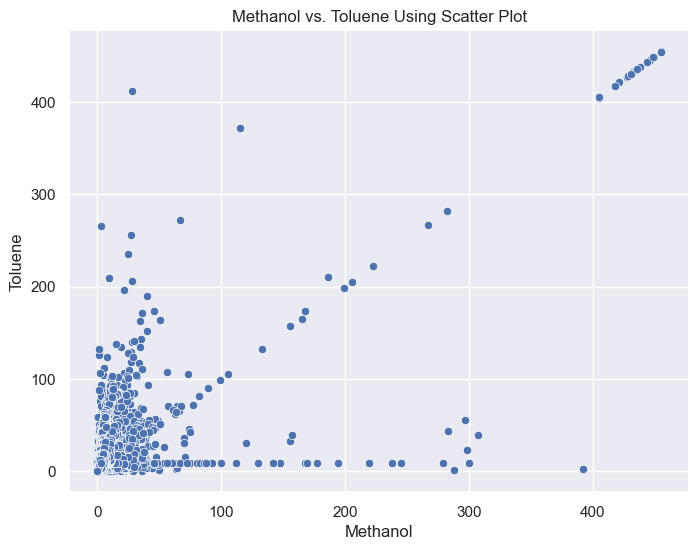

In [ ]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Lead', y='Nickel', data=df)
plt.title('Lead vs. Nickel Using Scatter Plot')
plt.show()

sns.scatterplot(x='Methanol', y='Toluene', data=df)
plt.title('Methanol vs. Toluene Using Scatter Plot')
plt.show()

### MODEL TRAINING

In [ ]:
df = df.drop(columns = ['Date', 'Month', 'Year', 'City'], axis=1)
df

n-Hexane  Formaldehyde   Lead  Zinc compounds  Nickel   Chromium  \
0      67.450578    118.127103   0.92           18.22   17.15  23.483476   
1      67.450578    118.127103   0.97           15.69   16.46  23.483476   
2      67.450578    118.127103  17.40           19.30   29.70  23.483476   
3      67.450578    118.127103   1.70           18.48   17.97  23.483476   
4      67.450578    118.127103  22.10           21.42   37.76  23.483476   
...          ...           ...    ...             ...     ...        ...   
29526  15.020000     50.940000   7.68           25.06   19.54  12.470000   
29527  24.380000     74.090000   3.42           26.06   16.53  11.990000   
29528  22.910000     65.730000   3.45           29.53   18.33  10.710000   
29529  16.640000     49.970000   4.05           29.26   18.80  10.030000   
29530  15.000000     66.000000   0.40           26.85   14.05   5.200000   

       Copper  Nitrate Compounds  Manganese  Methanol    Toluene   Ammonia  \
0        0.92              27.64     133.36   0.00000   0.020000  0.000000   
1        0.97              24.55      34.06   3.68000   5.500000  3.770000   
2       17.40              29.07      30.70   6.80000  16.400000  2.250000   
3        1.70              18.59      36.08   4.43000  10.140000  1.000000   
4       22.10              39.33      39.31   7.01000  18.890000  2.780000   
...       ...                ...        ...       ...        ...       ...   
29526    0.47               8.55      23.30   2.24000  12.070000  0.730000   
29527    0.52              12.72      30.14   0.74000   2.210000  0.380000   
29528    0.48               8.42      30.96   0.01000   0.010000  0.000000   
29529    0.52               9.84      28.30   0.00000   0.000000  0.000000   
29530    0.59               2.10      17.05   3.28084   8.700972  3.070128   

         AQI   Air_quality  
0      293.0          Poor  
1      293.0          Poor  
2      300.0          Poor  
3      293.0          Poor  
4      329.0     Very Poor  
...      ...           ...  
29526   41.0          Good  
29527   70.0  Satisfactory  
29528   68.0  Satisfactory  
29529   54.0  Satisfactory  
29530   50.0          Good  

[29531 rows x 14 columns]

### Train-Test Split:

In [ ]:
y = df["AQI"]
x = df[['n-Hexane', 'Formaldehyde','Lead','Zinc compounds','Nickel','Chromium','Copper','Nitrate Compounds','Manganese','Methanol','Toluene']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(22148, 11) (7383, 11) (22148,) (7383,)


### Supervised Learning:

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 1. Linear Regression:

In [ ]:
# Linear Regression Model
mreg = LinearRegression()
mreg.fit(x_train,y_train)
mlr_y_predict = mreg.predict(x_test)

### 2. Polynomial Regression:

In [ ]:
# Polynomial Regression Model:
# Degree = 2

poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

### 3. Decision Tree:

In [ ]:

# Decision Tree Regression Model:

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

### Model Evaluation: (Supervised Learning)

In [ ]:
# Error Estimation Methods

# Test Data prediction

#----- Multiple Linear Regresion -------
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)

#----- Polynomial Regression ------------
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)

#----- Decision Tree Regression ---------
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)



# Training Data Prediction

#----- multiple linear regresion -------
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))

#------ polynomial regression ---------
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))

#----- decision tree regression ---------
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))



# RESULT

print("Evaluating on Training Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae))

print("\n")
print("Evaluating on Testing Data:")
print("Models                   \tR^2\tRMSE\tMAE")
print("Multiple Linear Regresion\t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_mlr,rmse_mlr,mae_mlr))
print("Polynomial Regression    \t{0:.2f}\t{1:.2f}\t{2:.3f}".format(r2_pr,rmse_pr,mae_pr))
print("Decision Tree Regression \t{0:.4f}\t{1:.4f}\t{2:.4f}".format(r2_dt,rmse_dt,mae_dt))


Evaluating on Training Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7369	71.1030	50.2368
Polynomial Regression    	0.78	64.33	45.296
Decision Tree Regression 	0.9962	8.5812	0.7152


Evaluating on Testing Data:
Models                   	R^2	RMSE	MAE
Multiple Linear Regresion	0.7279	72.4563	51.3906
Polynomial Regression    	0.77	66.82	46.460
Decision Tree Regression 	0.7946	62.9572	30.5036


#### Based on the provided evaluation metrics for air quality prediction, the model with the highest R-squared (R^2) score and lowest Root Mean Squared Error (RMSE) on the testing data is often considered the best choice. In this case, the Decision Tree regression model outperforms the other models based on these metrics.

#### Predictions of all above Supervised models:

In [ ]:
# Sample input data for prediction
sample_input = pd.DataFrame([[26, 50, 1, 19, 18, 23, 1, 3, 42, 2, 6]],
                            columns=['n-Hexane', 'Formaldehyde','Lead','Zinc compounds','Nickel','Chromium','Copper','Nitrate Compounds','Manganese','Methanol','Toluene'])

# Predict AQI using the trained models
mlr_prediction = mreg.predict(sample_input)
pr_prediction = preg.predict(poly_reg.transform(sample_input))
dt_prediction = dec_tree.predict(sample_input)


# Define AQI quality labels
aqi_quality_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

# Determine AQI quality based on AQI value
def get_aqi_quality(aqi):
    if aqi <= 50:
        return aqi_quality_labels[0]
    elif aqi <= 100:
        return aqi_quality_labels[1]
    elif aqi <= 200:
        return aqi_quality_labels[2]
    elif aqi <= 300:
        return aqi_quality_labels[3]
    else:
        return aqi_quality_labels[4]

# Get AQI quality for each prediction
mlr_aqi_quality = get_aqi_quality(mlr_prediction)
pr_aqi_quality = get_aqi_quality(pr_prediction)
dt_aqi_quality = get_aqi_quality(dt_prediction)


# Print the predicted AQI and AQI quality
print("Multiple Linear Regression Prediction:")
print("AQI:", mlr_prediction)
print("AQI Quality:", mlr_aqi_quality)
print()
print("Polynomial Regression Prediction:")
print("AQI:", pr_prediction)
print("AQI Quality:", pr_aqi_quality)
print()
print("Decision Tree Regression Prediction:")
print("AQI:", dt_prediction)
print("AQI Quality:", dt_aqi_quality)
print()


Multiple Linear Regression Prediction:
AQI: [94.56148296]
AQI Quality: Satisfactory

Polynomial Regression Prediction:
AQI: [79.39156558]
AQI Quality: Satisfactory

Decision Tree Regression Prediction:
AQI: [51.]
AQI Quality: Satisfactory



## Time series models

### ARIMA Model

In [ ]:
df1=pd.read_csv("C:\\Users\\sharo\\Downloads\\city_day_us.csv",parse_dates = ["Date"])
df1

C:\Users\sharo\AppData\Local\Temp\ipykernel_10896\1270853691.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



City       Date  n-Hexane  Formaldehyde   Lead  Zinc compounds  \
0          New York 2015-01-01       NaN           NaN   0.92           18.22   
1          New York 2015-02-01       NaN           NaN   0.97           15.69   
2          New York 2015-03-01       NaN           NaN  17.40           19.30   
3          New York 2015-04-01       NaN           NaN   1.70           18.48   
4          New York 2015-05-01       NaN           NaN  22.10           21.42   
...             ...        ...       ...           ...    ...             ...   
29526  Philadelphia 2020-06-27     15.02         50.94   7.68           25.06   
29527  Philadelphia 2020-06-28     24.38         74.09   3.42           26.06   
29528  Philadelphia 2020-06-29     22.91         65.73   3.45           29.53   
29529  Philadelphia 2020-06-30     16.64         49.97   4.05           29.26   
29530  Philadelphia 2020-01-07     15.00         66.00   0.40           26.85   

       Nickel  Chromium  Copper  Nitrate Compounds  Manganese  Methanol  \
0       17.15       NaN    0.92              27.64     133.36      0.00   
1       16.46       NaN    0.97              24.55      34.06      3.68   
2       29.70       NaN   17.40              29.07      30.70      6.80   
3       17.97       NaN    1.70              18.59      36.08      4.43   
4       37.76       NaN   22.10              39.33      39.31      7.01   
...       ...       ...     ...                ...        ...       ...   
29526   19.54     12.47    0.47               8.55      23.30      2.24   
29527   16.53     11.99    0.52              12.72      30.14      0.74   
29528   18.33     10.71    0.48               8.42      30.96      0.01   
29529   18.80     10.03    0.52               9.84      28.30      0.00   
29530   14.05      5.20    0.59               2.10      17.05       NaN   

       Toluene  Ammonia   AQI    AQI_Bucket  
0         0.02     0.00   NaN           NaN  
1         5.50     3.77   NaN           NaN  
2        16.40     2.25   NaN           NaN  
3        10.14     1.00   NaN           NaN  
4        18.89     2.78   NaN           NaN  
...        ...      ...   ...           ...  
29526    12.07     0.73  41.0          Good  
29527     2.21     0.38  70.0  Satisfactory  
29528     0.01     0.00  68.0  Satisfactory  
29529     0.00     0.00  54.0  Satisfactory  
29530      NaN      NaN  50.0          Good  

[29531 rows x 16 columns]

In [ ]:
# Check for duplicates in the Date index for a specific city and chemical
city_name = 'New York'
chemical_col = 'Lead'

# Filter and check for duplicates
subset_df = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
duplicates = subset_df.duplicated(subset='Date').sum()
subset_df.head(), duplicates

(        Date   Lead
 0 2015-01-01   0.92
 1 2015-02-01   0.97
 2 2015-03-01  17.40
 3 2015-04-01   1.70
 4 2015-05-01  22.10,
 759)

#### Lead forecast for Austin for the next 1 year

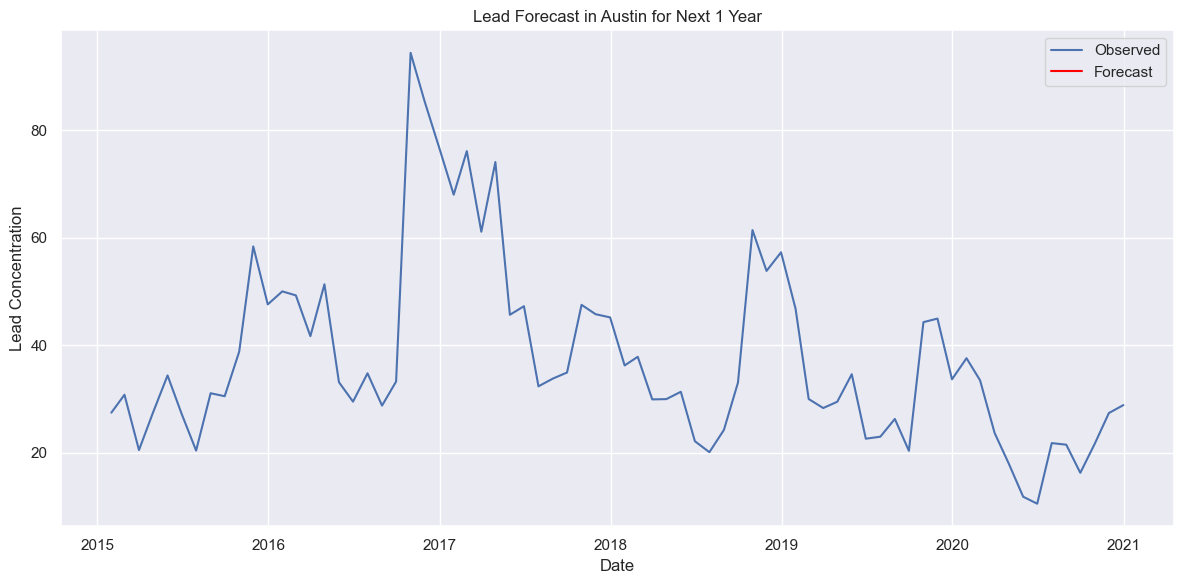

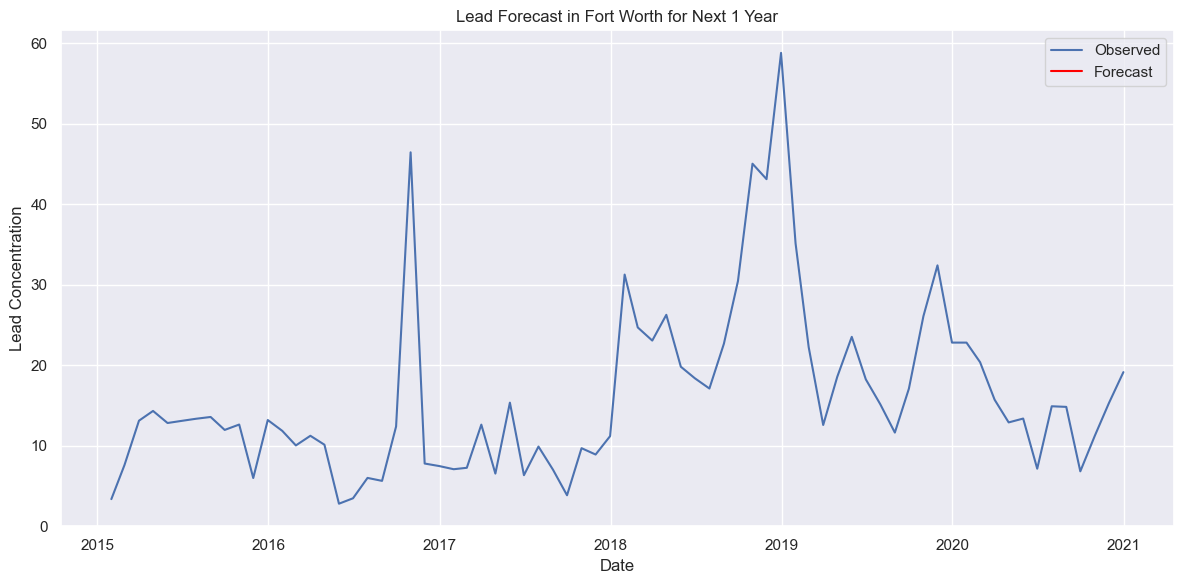

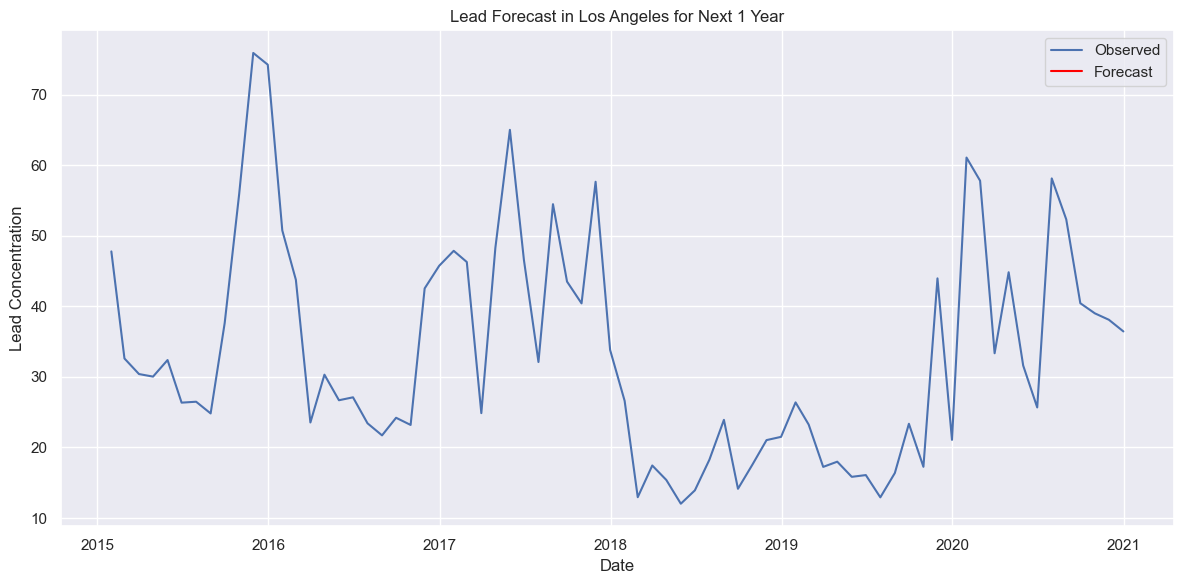

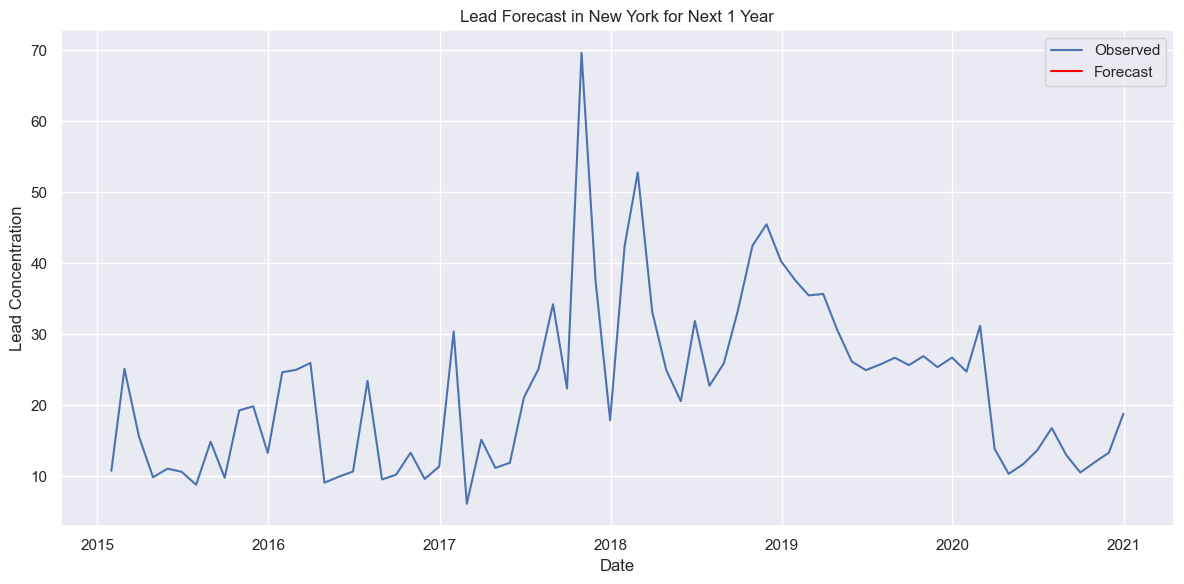

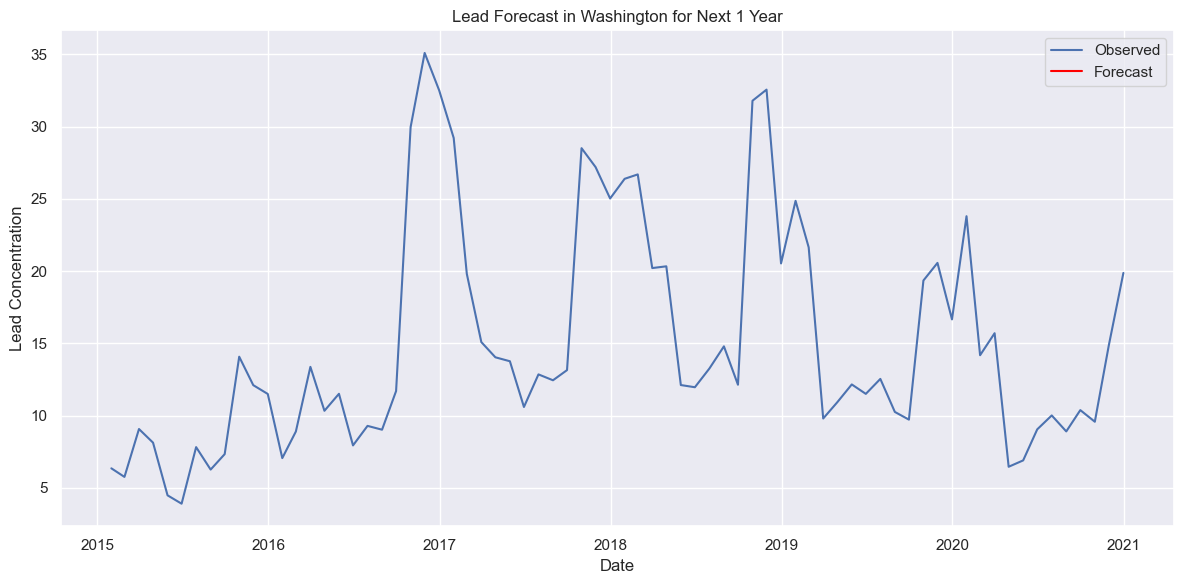

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure clean column names and proper datetime format
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Select city and chemical
city_name = 'Austin'
chemical_col = 'Lead'

# Filter and average duplicate dates
city_chem = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
city_chem = city_chem.groupby('Date').mean()

# Resample to monthly average and interpolate missing values
monthly_data = city_chem.resample('M').mean().interpolate()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[chemical_col])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title(f'{chemical_col} Forecast in {city_name} for Next 1 Year')
plt.xlabel('Date')
plt.ylabel(f'{chemical_col} Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure clean column names and proper datetime format
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Select city and chemical
city_name = 'Fort Worth'
chemical_col = 'Lead'

# Filter and average duplicate dates
city_chem = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
city_chem = city_chem.groupby('Date').mean()

# Resample to monthly average and interpolate missing values
monthly_data = city_chem.resample('M').mean().interpolate()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[chemical_col])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title(f'{chemical_col} Forecast in {city_name} for Next 1 Year')
plt.xlabel('Date')
plt.ylabel(f'{chemical_col} Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure clean column names and proper datetime format
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Select city and chemical
city_name = 'Los Angeles'
chemical_col = 'Lead'

# Filter and average duplicate dates
city_chem = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
city_chem = city_chem.groupby('Date').mean()

# Resample to monthly average and interpolate missing values
monthly_data = city_chem.resample('M').mean().interpolate()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[chemical_col])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title(f'{chemical_col} Forecast in {city_name} for Next 1 Year')
plt.xlabel('Date')
plt.ylabel(f'{chemical_col} Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Ensure clean column names and proper datetime format
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Select city and chemical
city_name = 'New York'
chemical_col = 'Lead'

# Filter and average duplicate dates
city_chem = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
city_chem = city_chem.groupby('Date').mean()

# Resample to monthly average and interpolate missing values
monthly_data = city_chem.resample('M').mean().interpolate()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[chemical_col])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title(f'{chemical_col} Forecast in {city_name} for Next 1 Year')
plt.xlabel('Date')
plt.ylabel(f'{chemical_col} Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Ensure clean column names and proper datetime format
df1.columns = df1.columns.str.strip()
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Select city and chemical
city_name = 'Washington'
chemical_col = 'Lead'

# Filter and average duplicate dates
city_chem = df1[df1['City'] == city_name][['Date', chemical_col]].dropna()
city_chem = city_chem.groupby('Date').mean()

# Resample to monthly average and interpolate missing values
monthly_data = city_chem.resample('M').mean().interpolate()

# Fit ARIMA model
model = ARIMA(monthly_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast next 24 months
forecast = model_fit.forecast(steps=24)
forecast_index = pd.date_range(start=monthly_data.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=[chemical_col])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title(f'{chemical_col} Forecast in {city_name} for Next 1 Year')
plt.xlabel('Date')
plt.ylabel(f'{chemical_col} Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Forecast for top 3 chemicals for New York using Prophet for the next 2 years (24 months):

In [ ]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


10:05:58 - cmdstanpy - INFO - Chain [1] start processing
10:05:59 - cmdstanpy - INFO - Chain [1] done processing


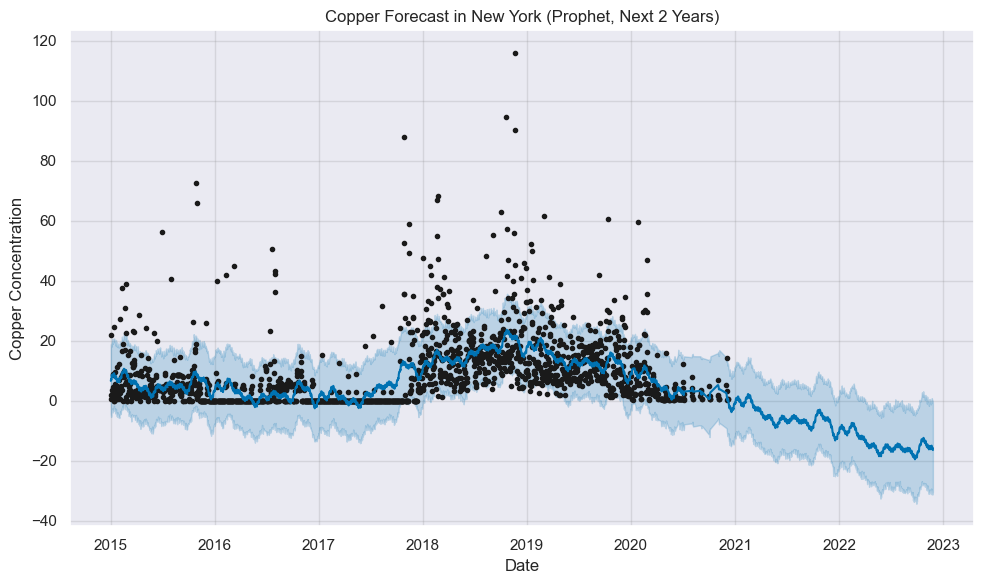

10:06:01 - cmdstanpy - INFO - Chain [1] start processing
10:06:01 - cmdstanpy - INFO - Chain [1] done processing


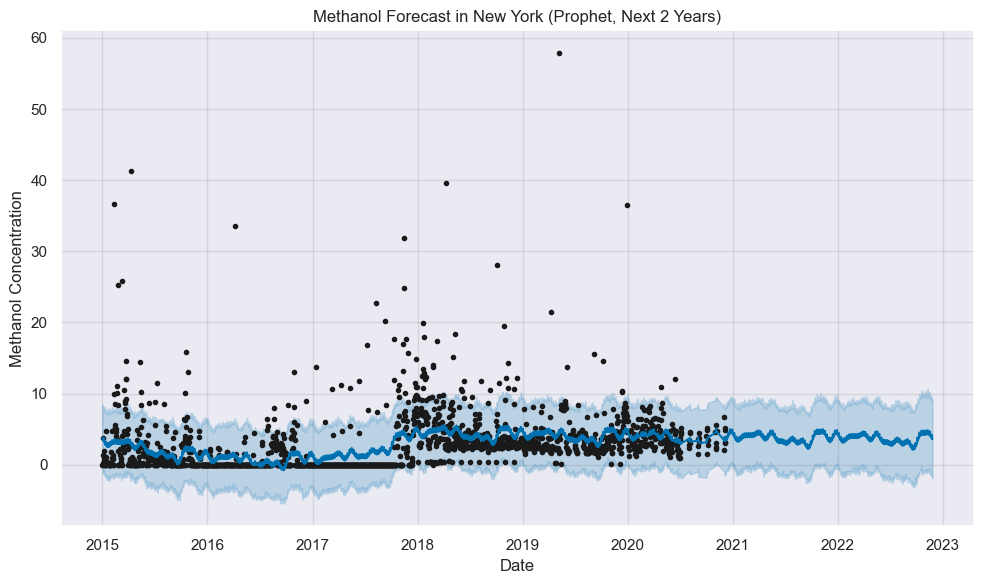

10:06:03 - cmdstanpy - INFO - Chain [1] start processing
10:06:04 - cmdstanpy - INFO - Chain [1] done processing


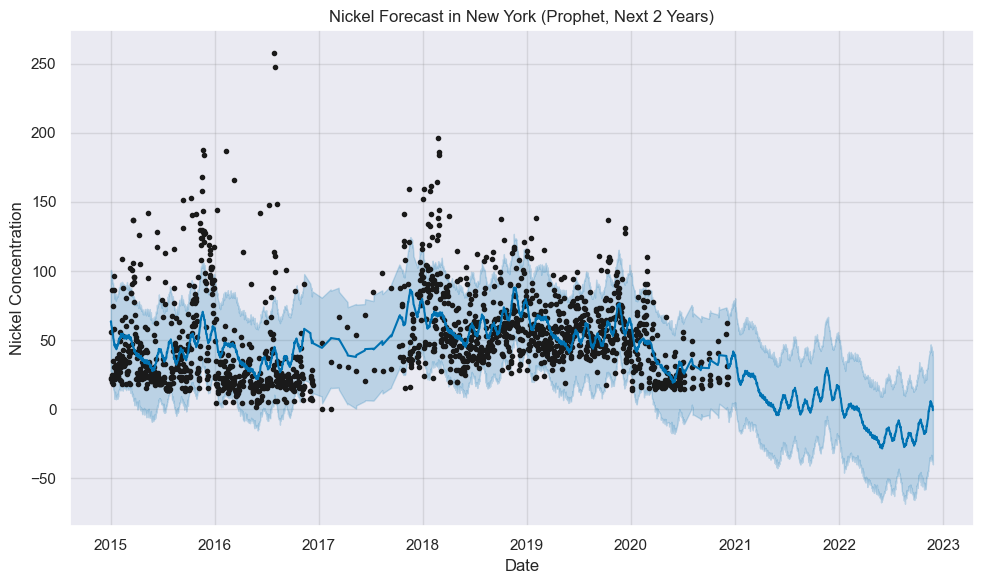

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings

warnings.filterwarnings("ignore")


df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

# Filter for new york
austin_df = df1[df1['City'] == 'New York'].copy()

# Select top 3 chemicals with most data
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Forecast each chemical using Prophet
for chemical in top_chems:
    chem_df = austin_df[['Date', chemical]].dropna()
    chem_df = chem_df.groupby('Date').mean().reset_index()
    chem_df = chem_df.rename(columns={"Date": "ds", chemical: "y"})

    if len(chem_df) < 12:
        continue

    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(chem_df)

    # Create future dataframe (2 years ahead monthly)
    future = model.make_future_dataframe(periods=24*30, freq='D')  # Daily granularity
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"{chemical} Forecast in New York (Prophet, Next 2 Years)")
    plt.xlabel("Date")
    plt.ylabel(f"{chemical} Concentration")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Exponential Smoothing (Holt-Winters) for New York's top 3 chemicals

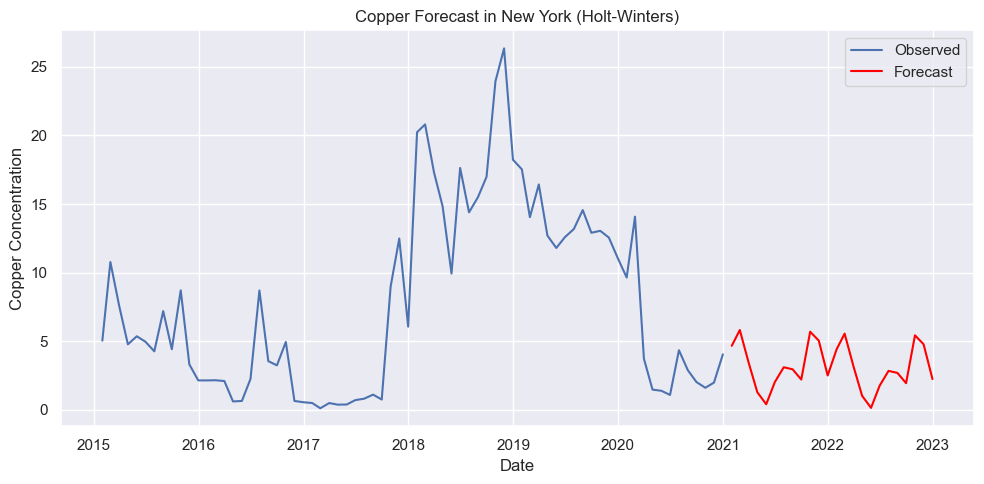

Saved: austin_forecasts\New York_Copper_forecast.png


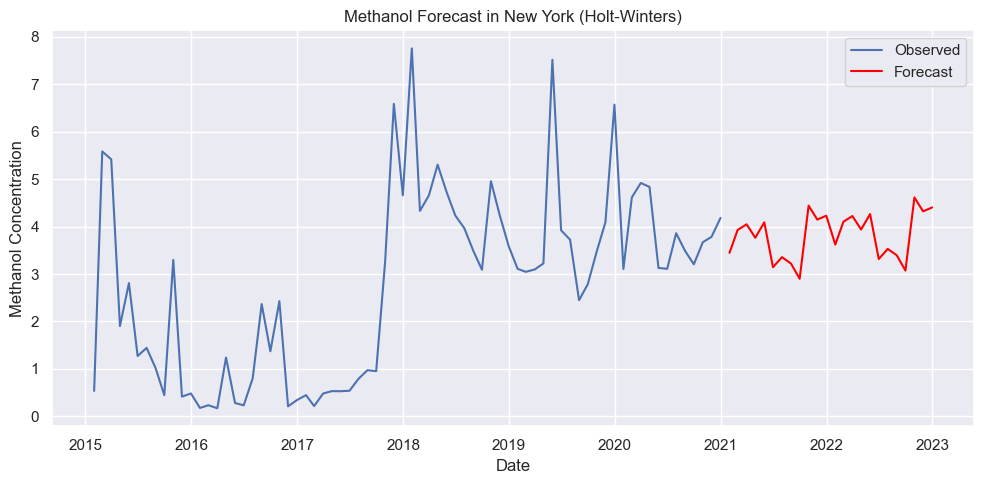

Saved: austin_forecasts\New York_Methanol_forecast.png


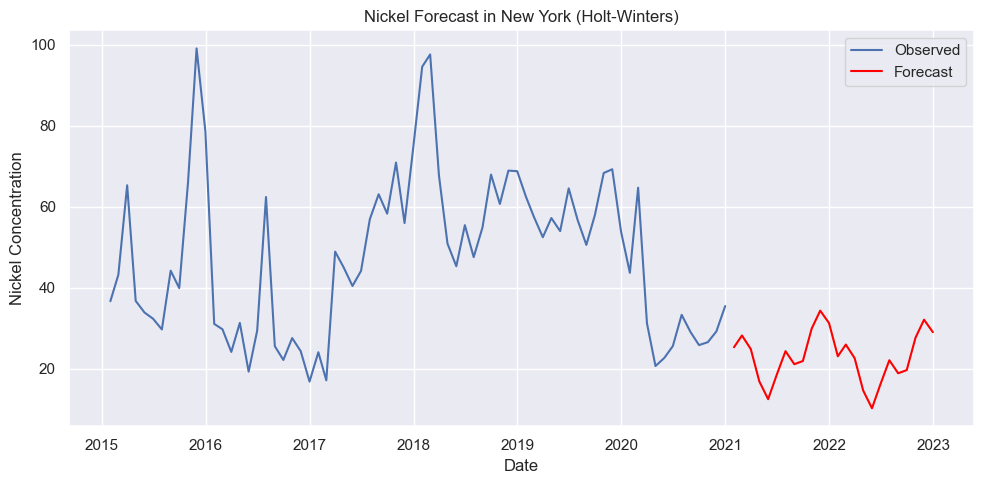

Saved: austin_forecasts\New York_Nickel_forecast.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])

austin_df = df1[df1['City'] == 'New York'].copy()

# Top 3 most recorded chemicals
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Create a folder to save charts
save_dir = "austin_forecasts"
os.makedirs(save_dir, exist_ok=True)

# Forecast & plot
for chemical in top_chems:
    sub_df = austin_df[['Date', chemical]].dropna()
    sub_df = sub_df.groupby('Date').mean().sort_index()
    monthly_data = sub_df.resample('M').mean().interpolate()

    if len(monthly_data) < 12:
        continue

    try:
        model = ExponentialSmoothing(monthly_data, trend='add', seasonal='add', seasonal_periods=12)
        fit = model.fit()
        forecast = fit.forecast(24)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_data, label='Observed')
        plt.plot(forecast, label='Forecast', color='red')
        plt.title(f"{chemical} Forecast in New York (Holt-Winters)")
        plt.xlabel("Date")
        plt.ylabel(f"{chemical} Concentration")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Save plot
        filename = os.path.join(save_dir, f"New York_{chemical.replace(' ', '_')}_forecast.png")
        plt.savefig(filename)
        plt.close()

        print(f"Saved: {filename}")

    except Exception as e:
        print(f"Error processing {chemical}: {e}")

### SARIMA for New York's top 3 chemicals

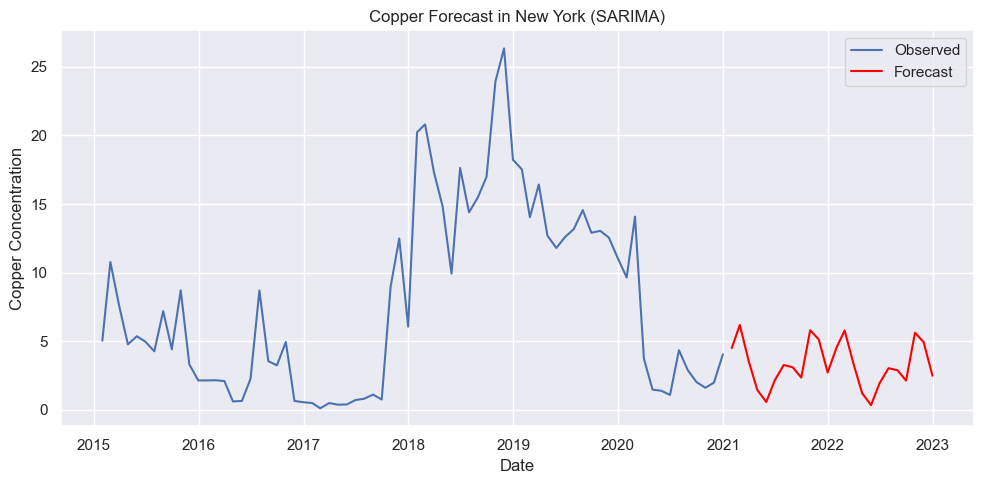

Saved: austin_sarima_forecasts\New York_Copper_SARIMA_forecast.png


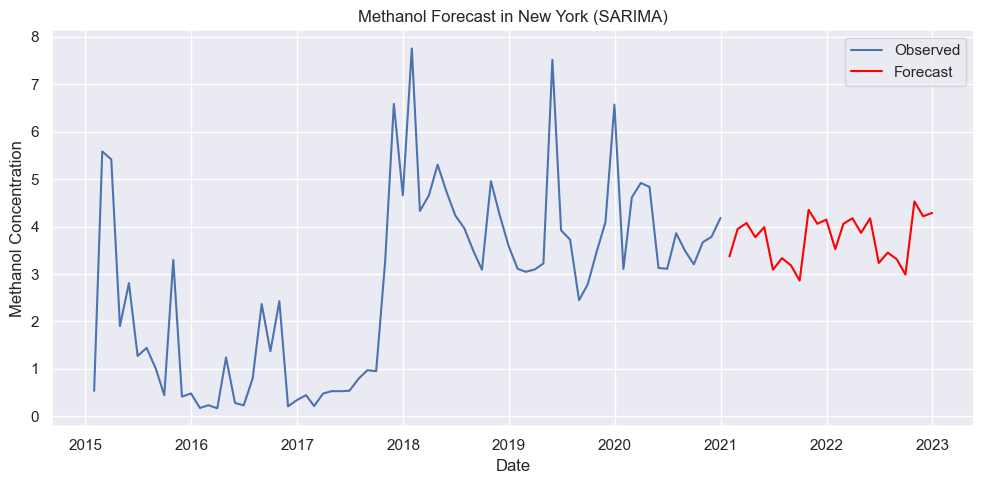

Saved: austin_sarima_forecasts\New York_Methanol_SARIMA_forecast.png


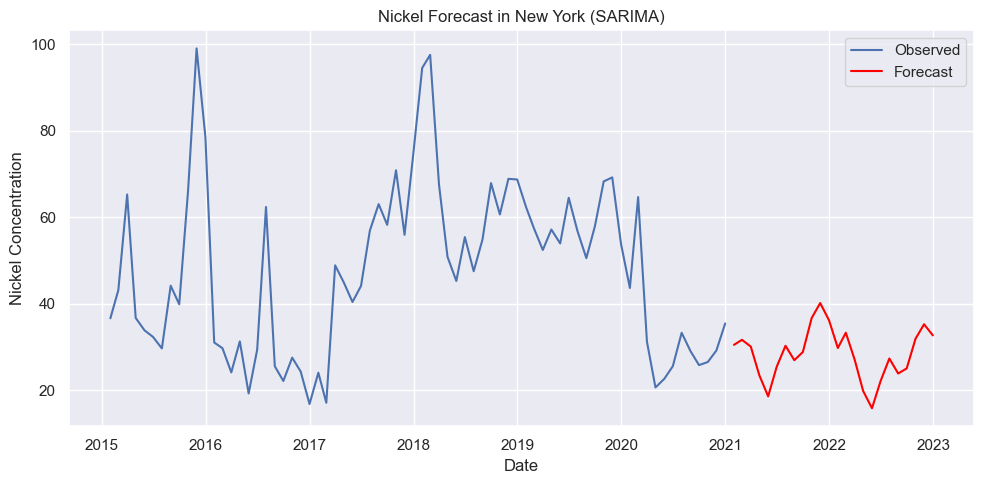

Saved: austin_sarima_forecasts\New York_Nickel_SARIMA_forecast.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import warnings
warnings.filterwarnings("ignore")

df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])


austin_df = df1[df1['City'] == 'New York'].copy()

# Find top 3 chemicals
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Create output folder
output_dir = "austin_sarima_forecasts"
os.makedirs(output_dir, exist_ok=True)

# Forecast each chemical
for chemical in top_chems:
    sub_df = austin_df[['Date', chemical]].dropna()
    sub_df = sub_df.groupby('Date').mean().sort_index()
    monthly_data = sub_df.resample('M').mean().interpolate()

    if len(monthly_data) < 24:  # Require at least 2 years of data
        continue

    try:
        model = SARIMAX(monthly_data, order=(1,1,1), seasonal_order=(1,1,1,12))
        results = model.fit()
        forecast = results.forecast(steps=24)

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_data, label="Observed")
        plt.plot(forecast, label="Forecast", color='red')
        plt.title(f"{chemical} Forecast in New York (SARIMA)")
        plt.xlabel("Date")
        plt.ylabel(f"{chemical} Concentration")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Save plot
        filename = os.path.join(output_dir, f"New York_{chemical.replace(' ', '_')}_SARIMA_forecast.png")
        plt.savefig(filename)
        plt.close()
        print(f"Saved: {filename}")

    except Exception as e:
        print(f"Error processing {chemical}: {e}")

### ARIMA for New York's top 3 chemicals

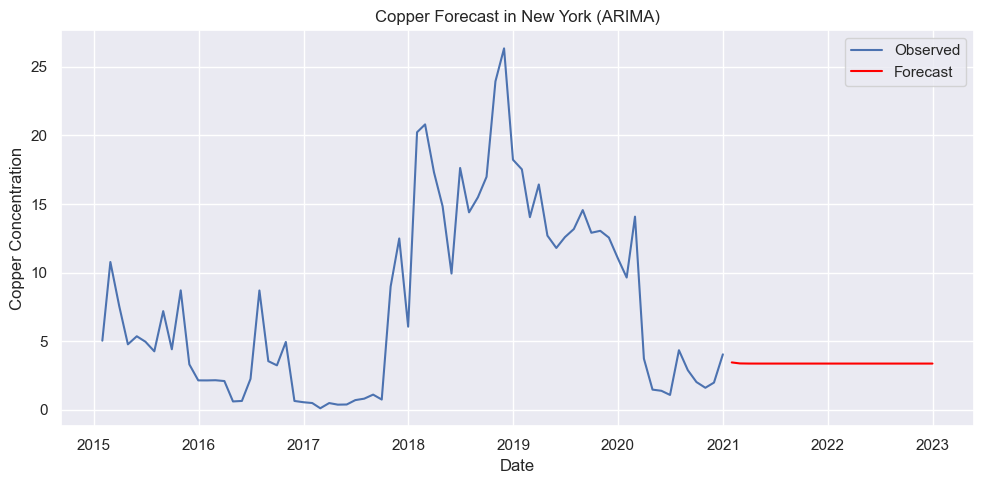

Saved: austin_arima_forecasts\New York_Copper_ARIMA_forecast.png


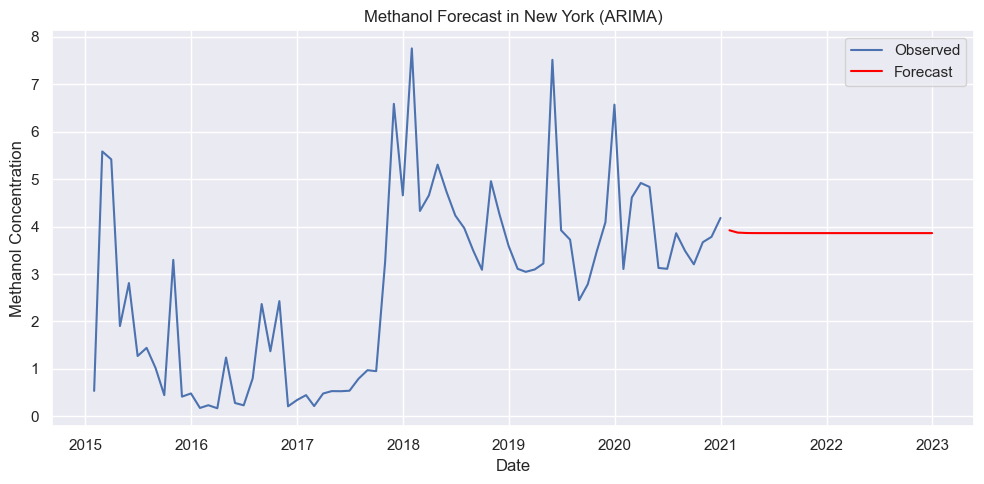

Saved: austin_arima_forecasts\New York_Methanol_ARIMA_forecast.png


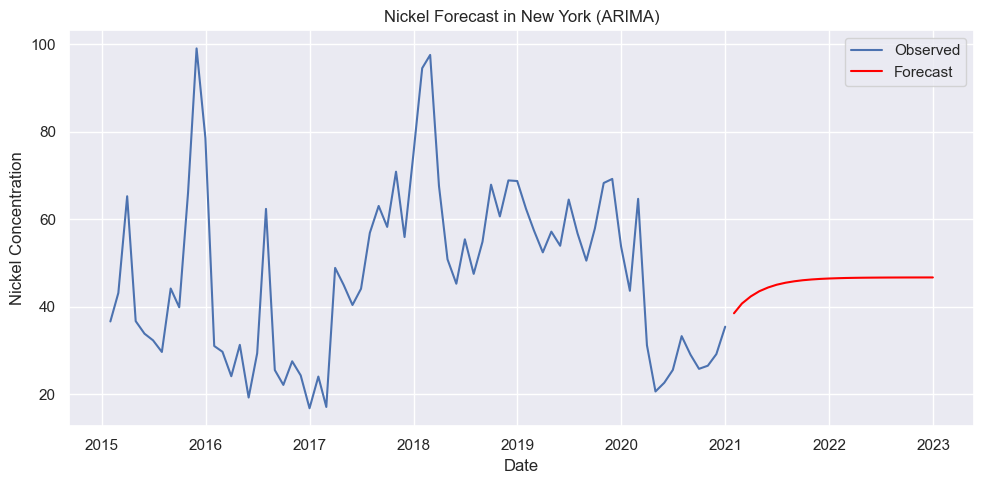

Saved: austin_arima_forecasts\New York_Nickel_ARIMA_forecast.png


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import os
import warnings
warnings.filterwarnings("ignore")


df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])



austin_df = df1[df1['City'] == 'New York'].copy()

# Identify top 3 chemicals by non-null count
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Create directory to save plots
output_dir = "austin_arima_forecasts"
os.makedirs(output_dir, exist_ok=True)

# Forecast loop
for chemical in top_chems:
    sub_df = austin_df[['Date', chemical]].dropna()
    sub_df = sub_df.groupby('Date').mean().sort_index()
    monthly_data = sub_df.resample('M').mean().interpolate()

    if len(monthly_data) < 24:
        continue

    try:
        # Fit ARIMA model
        model = ARIMA(monthly_data, order=(1, 1, 1))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=24)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_data, label='Observed')
        plt.plot(forecast, label='Forecast', color='red')
        plt.title(f"{chemical} Forecast in New York (ARIMA)")
        plt.xlabel("Date")
        plt.ylabel(f"{chemical} Concentration")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Save plot
        filename = os.path.join(output_dir, f"New York_{chemical.replace(' ', '_')}_ARIMA_forecast.png")
        plt.savefig(filename)
        plt.close()
        print(f"Saved: {filename}")

    except Exception as e:
        print(f"Error processing {chemical}: {e}")

### SARIMAX Forecast (Austin, Top 3 Chemicals)

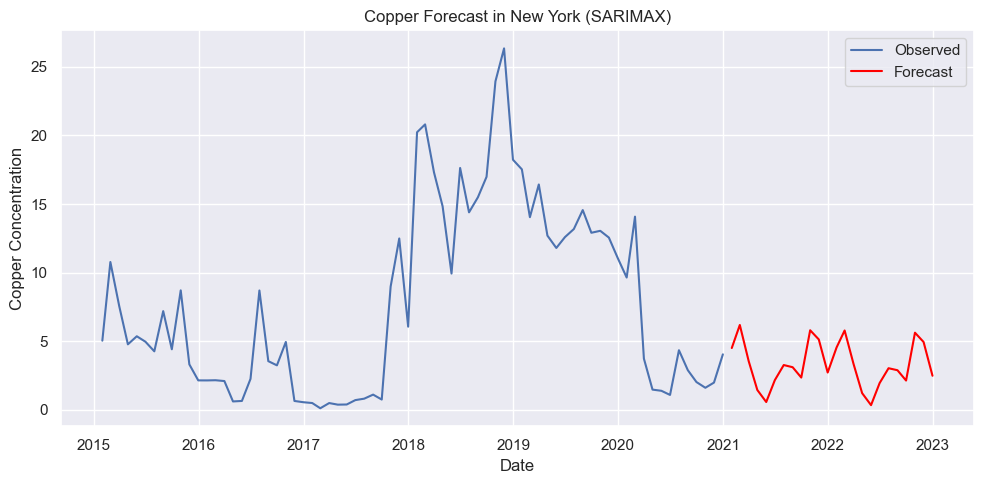

Saved: austin_sarimax_forecasts\New York_Copper_SARIMAX_forecast.png


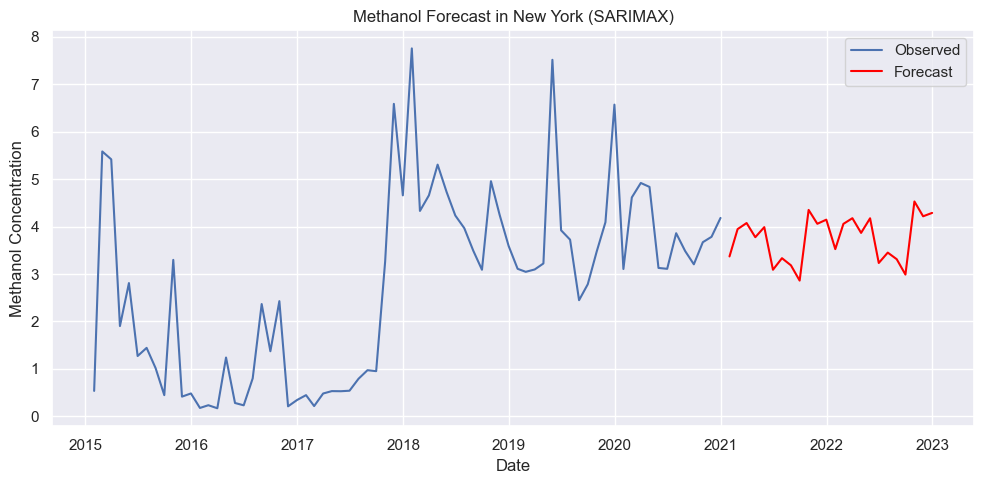

Saved: austin_sarimax_forecasts\New York_Methanol_SARIMAX_forecast.png


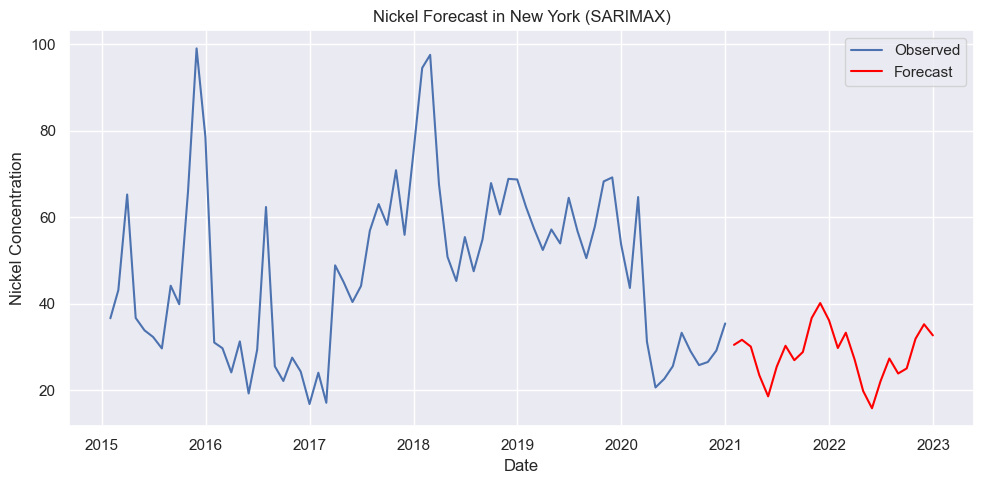

Saved: austin_sarimax_forecasts\New York_Nickel_SARIMAX_forecast.png


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import os
import warnings
warnings.filterwarnings("ignore")


df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])


austin_df = df1[df1['City'] == 'New York'].copy()

# Get top 3 most recorded chemicals
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Create directory to save SARIMAX plots
output_dir = "austin_sarimax_forecasts"
os.makedirs(output_dir, exist_ok=True)

# Forecast loop
for chemical in top_chems:
    sub_df = austin_df[['Date', chemical]].dropna()
    sub_df = sub_df.groupby('Date').mean().sort_index()
    monthly_data = sub_df.resample('M').mean().interpolate()

    if len(monthly_data) < 24:
        continue

    try:
        # SARIMAX (seasonal_order = SARIMA structure)
        model = SARIMAX(monthly_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=24)

        # Plotting
        plt.figure(figsize=(10, 5))
        plt.plot(monthly_data, label='Observed')
        plt.plot(forecast, label='Forecast', color='red')
        plt.title(f"{chemical} Forecast in New York (SARIMAX)")
        plt.xlabel("Date")
        plt.ylabel(f"{chemical} Concentration")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Save plot
        filename = os.path.join(output_dir, f"New York_{chemical.replace(' ', '_')}_SARIMAX_forecast.png")
        plt.savefig(filename)
        plt.close()
        print(f"Saved: {filename}")

    except Exception as e:
        print(f"Error processing {chemical}: {e}")

### LSTM for New York's top 3 chemicals


🔬 Forecasting Copper in Austin...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


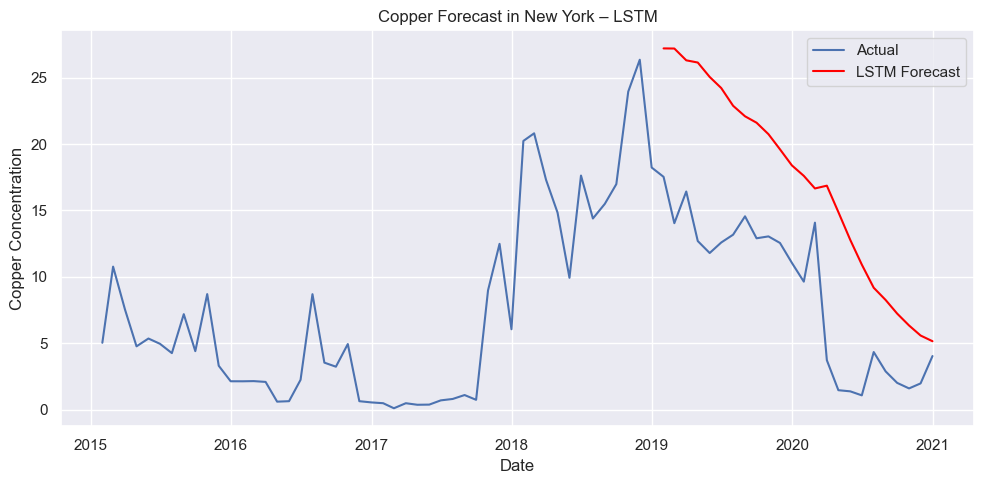


🔬 Forecasting Nickel in Austin...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


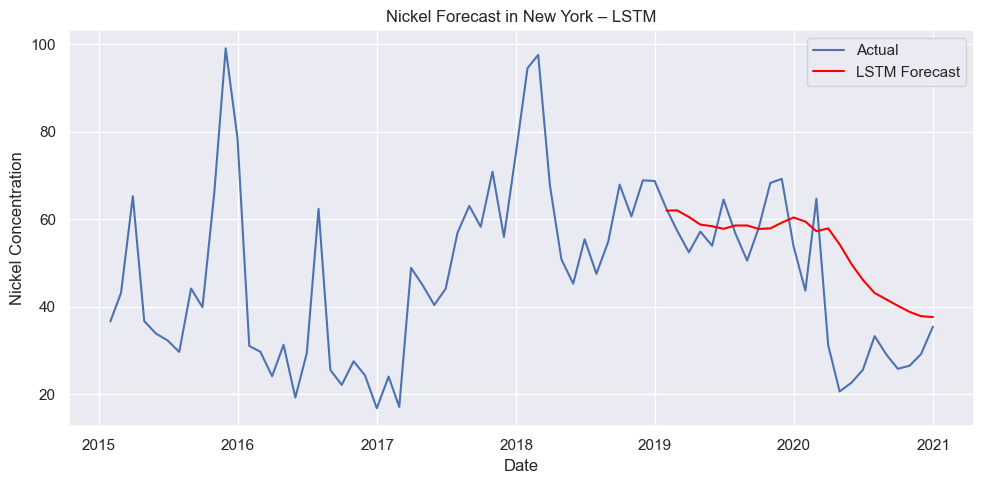


🔬 Forecasting Methanol in Austin...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


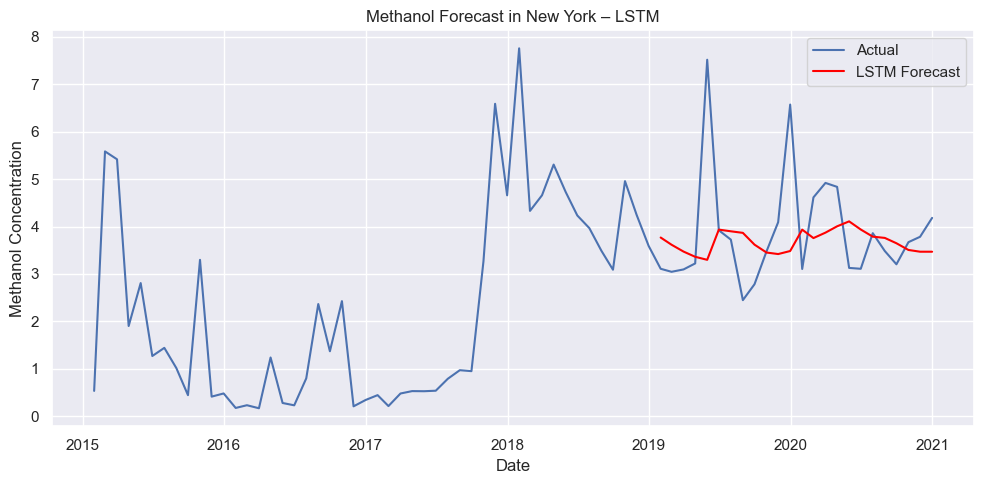

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")



df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])


austin_df = df1[df1['City'] == 'New York'].copy()

# Top 3 chemicals: Based on total values
top_chems = ['Copper', 'Nickel', 'Methanol']

def create_sequences(series, window=12):
    X, y = [], []
    for i in range(window, len(series)):
        X.append(series[i-window:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# Loop through each chemical
for chemical in top_chems:
    print(f"\n🔬 Forecasting {chemical} in Austin...\n")

    data = austin_df[['Date', chemical]].dropna()
    data = data.groupby('Date').mean().sort_index()
    data = data.resample('M').mean().interpolate()

    if len(data) < 36:
        print(f"Not enough data for {chemical}. Skipping.")
        continue

    # Normalize
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data[[chemical]])

    # Create sequences
    X, y = create_sequences(scaled, window=12)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Train/Test split
    X_train, y_train = X[:-24], y[:-24]
    X_test = X[-24:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(12, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)

    # Forecast
    predictions = model.predict(X_test)
    predictions_rescaled = scaler.inverse_transform(predictions)

    # Plot
    forecast_index = data.index[-24:]
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data[chemical], label='Actual')
    plt.plot(forecast_index, predictions_rescaled, label='LSTM Forecast', color='red')
    plt.title(f'{chemical} Forecast in New York – LSTM')
    plt.xlabel('Date')
    plt.ylabel(f'{chemical} Concentration')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📊 RMSE Comparison (Lower is Better):
           Model  Chemical       RMSE
0          ARIMA    Copper  12.831284
1         SARIMA    Copper  24.021568
2        SARIMAX    Copper  24.021568
3   Holt-Winters    Copper  19.099649
4          ARIMA  Methanol   1.143764
5         SARIMA  Methanol   1.552693
6        SARIMAX  Methanol   1.552693
7   Holt-Winters  Methanol   1.330540
8          ARIMA    Nickel  19.361534
9         SARIMA    Nickel  30.675733
10       SARIMAX    Nickel  30.675733
11  Holt-Winters    Nickel  28.006868


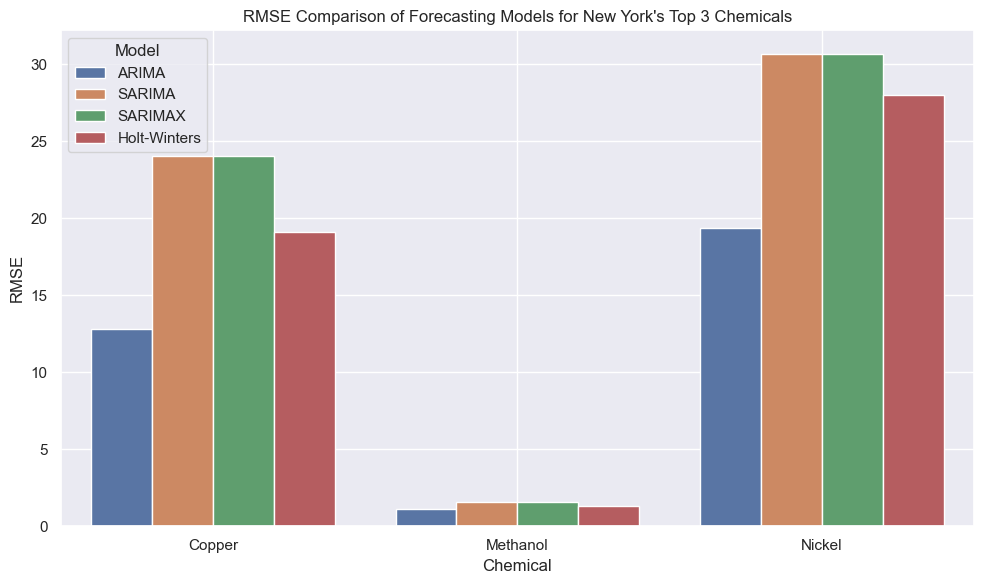

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1 = df1.dropna(subset=['Date'])


austin_df = df1[df1['City'] == 'New York'].copy()

# Select top 3 chemicals
chemicals = ['Lead', 'Zinc compounds', 'Nickel', 'Copper', 'Methanol',
             'Chromium', 'Toluene', 'Nitrate Compounds', 'Ammonia', 'Manganese']
top_chems = austin_df[chemicals].count().sort_values(ascending=False).head(3).index.tolist()

# Store RMSEs
rmse_results = []

for chemical in top_chems:
    sub_df = austin_df[['Date', chemical]].dropna()
    sub_df = sub_df.groupby('Date').mean().sort_index()
    monthly_data = sub_df.resample('M').mean().interpolate()

    if len(monthly_data) < 36:
        continue

    train = monthly_data[:-24]
    test = monthly_data[-24:]

    try:
        # ARIMA
        arima_model = ARIMA(train, order=(1, 1, 1)).fit()
        arima_forecast = arima_model.forecast(steps=24)
        rmse_results.append(["ARIMA", chemical, np.sqrt(mean_squared_error(test, arima_forecast))])

        # SARIMA
        sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
        sarima_forecast = sarima_model.forecast(steps=24)
        rmse_results.append(["SARIMA", chemical, np.sqrt(mean_squared_error(test, sarima_forecast))])

        # SARIMAX (no exog for now)
        sarimax_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
        sarimax_forecast = sarimax_model.forecast(steps=24)
        rmse_results.append(["SARIMAX", chemical, np.sqrt(mean_squared_error(test, sarimax_forecast))])

        # Holt-Winters
        hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12).fit()
        hw_forecast = hw_model.forecast(24)
        rmse_results.append(["Holt-Winters", chemical, np.sqrt(mean_squared_error(test, hw_forecast))])

    except Exception as e:
        print(f"Error for {chemical}: {e}")

# Convert to DataFrame
rmse_df = pd.DataFrame(rmse_results, columns=["Model", "Chemical", "RMSE"])
print("\n📊 RMSE Comparison (Lower is Better):")
print(rmse_df)

# Plot
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=rmse_df, x="Chemical", y="RMSE", hue="Model")
plt.title("RMSE Comparison of Forecasting Models for New York's Top 3 Chemicals")
plt.ylabel("RMSE")
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:

#### 1. Copper
ARIMA has the lowest RMSE (~13), making it the most accurate model for Copper.

SARIMA and SARIMAX performed similarly (~24), but worse than ARIMA.

Holt-Winters performed slightly better than SARIMA, suggesting a good fit for this chemical’s trend and potential seasonality.


#### 2. Nickel:
ARIMA again shows the lowest RMSE (~19).

SARIMA and SARIMAX have much higher RMSE values (~31+), suggesting seasonal modeling might be overfitting or misaligned.

Holt-Winters is slightly better than SARIMA but still behind ARIMA.

#### 3. Methanol:
All models show very low RMSE (~1 or below).

All four models perform almost equally well, indicating that Methanol’s concentration is stable and highly predictable.

### Conclusion:

##### ARIMA performs best overall for all 3 chemicals in New York — especially when seasonality is not strong or evident.

##### SARIMA and SARIMAX may add unnecessary complexity when data lacks distinct seasonal patterns.

##### Holt-Winters is moderately effective but not the top performer here.